# **EC1B1 Python Mini Assignment**

#1: Data Collection

## 1 Setting Up The Environment

In [203]:
# Data Collection Dictionaries
import io
import pandas as pd
import requests
import openpyxl

# Data Visualisation Dictionaries
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from matplotlib.ticker import StrMethodFormatter
import matplotlib.cm as cm

# Data Transformation & Regression
import statsmodels.formula.api as smf

## 2 Access The Data Via URL Link

This code effectively downloads an Excel file from a URL, reads its content, and displays the initial portion of the data in a structured format using a pandas DataFrame.

I replaced the *"edit?usp=sharing&ouid=100289575522423538038&rtpof=true&sd=true"* with *"export?format=xlsx"* to download the file properly from the below link:
https://docs.google.com/spreadsheets/d/1Sep65Po8tHumtXIgW4aKWGJhW0b3LhE8/edit?usp=sharing&ouid=100289575522423538038&rtpof=true&sd=true


In [204]:
url = "https://docs.google.com/spreadsheets/d/1Sep65Po8tHumtXIgW4aKWGJhW0b3LhE8/export?format=xlsx"

try:
    # Fetch the data
    response = requests.get(url)
    # Raise HTTPError for bad responses (4xx or 5xx)
    response.raise_for_status()

    # Load the Excel file into an openpyxl workbook
    workbook = openpyxl.load_workbook(io.BytesIO(response.content))

    print("Excel file accessed successfully!")

except requests.exceptions.RequestException as e:
    print(f"Error accessing the Excel file: {e}")
    if response.status_code == 404:
        print("Specific Error: File not found (404). Check the URL.")
    elif response.status_code == 403:
        print("Specific Error: Access denied (403). You might not have permission to access the file.")
    # Add more specific error checks as needed

except openpyxl.utils.exceptions.InvalidFileException as e:
    print(f"Error loading the Excel file: {e}")
    print("Specific Error: Invalid file format. The file might be corrupted or not a valid Excel file.")

except Exception as e:
    print(f"An unexpected error occurred: {e}")

Excel file accessed successfully!


## 3 Importing Data With User Input & Merging DataFrame



*   This code snippet utilizes the openpyxl library to load an Excel file and extract sheet names.
*   It then prompts the user to input the indices of desired sheets, reads data from those sheets into separate pandas DataFrames using pd.read_excel, and stores them in a list.
*   Finally, it combines these DataFrames into a single DataFrame called combined_df using pd.concat, enabling further analysis on the consolidated data.
*   This process allows for flexible data import by selecting specific sheets from an Excel file and combining them into a single structure.

*Caution*


*   When running the code, make sure to only input sheets 2,3,4,5,6,7 to read and save into a dataframe.
*   Saving sheets 0 & 1 may lead to issues with left joining as "countrycode" and "year" keys are absent from those 2 sheets

In [205]:
# Load the Excel file into an openpyxl workbook
workbook = openpyxl.load_workbook(io.BytesIO(response.content))

# Get the sheet names
sheet_names = workbook.sheetnames

# Print the sheet names and their indices
print("Sheet names in the Excel file:")
for i, sheet_name in enumerate(sheet_names):
    print(f"{i}: {sheet_name}")

# Get user input for sheet range
while True:
    sheet_range_choice = input("Enter 'all' to import all sheets (0-7) or '2-7' to import sheets 2 to 7: ").lower()
    if sheet_range_choice in ("all", "2-7"):
        break
    print("Invalid choice. Please enter 'all' or '2-7'.")

# Determine selected sheet indices based on user choice
if sheet_range_choice == "all":
    selected_indices = list(range(len(sheet_names)))  # All sheets (0 to 7)
else:
    selected_indices = list(range(2, 8))  # Sheets 2 to 7

# Get the selected sheet names
selected_sheet_names = [sheet_names[i] for i in selected_indices]

# Create an empty list to store the DataFrames
dfs = []

# Loop through the selected sheet names and import data
for sheet_name in selected_sheet_names:
    df = pd.read_excel(io.BytesIO(response.content), engine="openpyxl", sheet_name=sheet_name)
    dfs.append(df)  # Add the DataFrame to the list

# Perform left join on the DataFrames using multiple common columns with custom suffixes
# Start with the first DataFrame
combined_df = dfs[0]
for i in range(1, len(dfs)):
    # Assuming 'countrycode' and 'year' are the common columns
    common_columns = ['countrycode', 'year']
    # Specify custom suffixes to avoid conflicts
    combined_df = pd.merge(combined_df, dfs[i], on=common_columns, how='left', suffixes=('_' + str(i - 1), '_' + str(i)))

# Now you can work with the combined data in the DataFrame 'combined_df'
print("\nCombined DataFrame:")
combined_df.head()

Sheet names in the Excel file:
0: Info
1: Legend
2: rgdpna
3: rnna
4: emp
5: hc
6: pop
7: labsh
Enter 'all' to import all sheets (0-7) or '2-7' to import sheets 2 to 7: 2-7

Combined DataFrame:


,countrycode,country_0,currency_unit_0,year,rgdpna,country_1,currency_unit_1,rnna,country_2,currency_unit_2,emp,country_3,currency_unit_3,hc,country_4,currency_unit_4,pop,country_5,currency_unit_5,labsh
0,AGO,Angola,Kwanza,1970,54237.054688,Angola,Kwanza,295517.62500,Angola,Kwanza,3.666207,Angola,Kwanza,1.015686,Angola,Kwanza,5.890365,Angola,Kwanza,0.284385
1,AGO,Angola,Kwanza,1971,57491.277344,Angola,Kwanza,314195.09375,Angola,Kwanza,3.742484,Angola,Kwanza,1.018196,Angola,Kwanza,6.040777,Angola,Kwanza,0.284385
2,AGO,Angola,Kwanza,1972,57606.261719,Angola,Kwanza,332435.84375,Angola,Kwanza,3.853271,Angola,Kwanza,1.020712,Angola,Kwanza,6.248552,Angola,Kwanza,0.284385
3,AGO,Angola,Kwanza,1973,62272.367188,Angola,Kwanza,352647.90625,Angola,Kwanza,3.987807,Angola,Kwanza,1.023234,Angola,Kwanza,6.496962,Angola,Kwanza,0.284385
4,AGO,Angola,Kwanza,1974,64202.808594,Angola,Kwanza,373267.71875,Angola,Kwanza,4.130696,Angola,Kwanza,1.025762,Angola,Kwanza,6.761380,Angola,Kwanza,0.284385


##4 Remove Extra Columns

In [206]:
# Rename columns
combined_df = combined_df.rename(
    columns={
        "country_0": "country",
        "currency_unit_0": "currency_unit",
    }
)

# Columns to drop
columns_to_drop = [
    "country_1",
    "currency_unit_1",
    "country_2",
    "currency_unit_2",
    "country_3",
    "currency_unit_3",
    "country_4",
    "currency_unit_4",
    "country_5",
    "currency_unit_5",
]

# Drop the columns
combined_df = combined_df.drop(columns=columns_to_drop, errors='ignore')  # errors='ignore' to avoid errors if columns don't exist

# Display the updated DataFrame
print("\nUpdated DataFrame:")
combined_df.head()


Updated DataFrame:


,countrycode,country,currency_unit,year,rgdpna,rnna,emp,hc,pop,labsh
0,AGO,Angola,Kwanza,1970,54237.054688,295517.62500,3.666207,1.015686,5.890365,0.284385
1,AGO,Angola,Kwanza,1971,57491.277344,314195.09375,3.742484,1.018196,6.040777,0.284385
2,AGO,Angola,Kwanza,1972,57606.261719,332435.84375,3.853271,1.020712,6.248552,0.284385
3,AGO,Angola,Kwanza,1973,62272.367188,352647.90625,3.987807,1.023234,6.496962,0.284385
4,AGO,Angola,Kwanza,1974,64202.808594,373267.71875,4.130696,1.025762,6.761380,0.284385


#2: Data Cleaning

## 1 Data Exploration For Null Values

###1.1 Remove "pop" & "labsh" Columns

In [207]:
# Assign columns to drop to a variable
columns_to_drop = ['pop', 'labsh']

# Verify such columns to drop
print(columns_to_drop)

# Drop the specified columns
combined_df = combined_df.drop(columns=columns_to_drop)

# Visual Check For Removal
combined_df

['pop', 'labsh']


,countrycode,country,currency_unit,year,rgdpna,rnna,emp,hc
0,AGO,Angola,Kwanza,1970,54237.054688,295517.625000,3.666207,1.015686
1,AGO,Angola,Kwanza,1971,57491.277344,314195.093750,3.742484,1.018196
2,AGO,Angola,Kwanza,1972,57606.261719,332435.843750,3.853271,1.020712
3,AGO,Angola,Kwanza,1973,62272.367188,352647.906250,3.987807,1.023234
4,AGO,Angola,Kwanza,1974,64202.808594,373267.718750,4.130696,1.025762
...,...,...,...,...,...,...,...,...
7715,ZWE,Zimbabwe,US Dollar,2015,42008.199219,64916.476562,6.393752,2.584653
7716,ZWE,Zimbabwe,US Dollar,2016,42325.726562,66257.859375,6.504374,2.616257
7717,ZWE,Zimbabwe,US Dollar,2017,44316.742188,67627.562500,6.611773,2.648248
7718,ZWE,Zimbabwe,US Dollar,2018,46457.097656,69059.625000,6.714952,2.680630


### 1.2 Check For Empty Rows

In [208]:
# Filter rows with empty 'rgdpna' values
empty_emp_rows = combined_df[combined_df['emp'].isnull()]

# Display the filtered rows
print(empty_emp_rows)

Empty DataFrame
Columns: [countrycode, country, currency_unit, year, rgdpna, rnna, emp, hc]
Index: []


### 1.4 Remove Rows With Empty Values

In [209]:
# Drop rows with missing values in 'emp' column
combined_df = combined_df.dropna(subset=['emp'])

### 1.5 Check For Missing Columns

In [210]:
# Filter rows with any missing values
rows_with_missing_values = combined_df[combined_df.isnull().any(axis=1)]

# Display the filtered rows
rows_with_missing_values

,countrycode,country,currency_unit,year,rgdpna,rnna,emp,hc


Check For any NaN values

In [211]:
# Count rows with any NaN values
num_rows_with_nan = combined_df.isnull().any(axis=1).sum()

# Print the result
print(f"Number of rows with NaN values: {num_rows_with_nan}")

Number of rows with NaN values: 0


### 1.6 Rename Columns

In [212]:
# Rename columns and assign to a new DataFrame
renamed_combined_df = combined_df.rename(columns={
    'rgdpna': 'Real GDP',
    'rnna': 'Capital',
    'emp': 'Labour',
    'hc': 'Human Capital'
})
renamed_combined_df

,countrycode,country,currency_unit,year,Real GDP,Capital,Labour,Human Capital
0,AGO,Angola,Kwanza,1970,54237.054688,295517.625000,3.666207,1.015686
1,AGO,Angola,Kwanza,1971,57491.277344,314195.093750,3.742484,1.018196
2,AGO,Angola,Kwanza,1972,57606.261719,332435.843750,3.853271,1.020712
3,AGO,Angola,Kwanza,1973,62272.367188,352647.906250,3.987807,1.023234
4,AGO,Angola,Kwanza,1974,64202.808594,373267.718750,4.130696,1.025762
...,...,...,...,...,...,...,...,...
7715,ZWE,Zimbabwe,US Dollar,2015,42008.199219,64916.476562,6.393752,2.584653
7716,ZWE,Zimbabwe,US Dollar,2016,42325.726562,66257.859375,6.504374,2.616257
7717,ZWE,Zimbabwe,US Dollar,2017,44316.742188,67627.562500,6.611773,2.648248
7718,ZWE,Zimbabwe,US Dollar,2018,46457.097656,69059.625000,6.714952,2.680630


### 1.7 Remove Unnecessary 'countrycode' Column

In [213]:
# Drop the 'countrycode' column
renamed_combined_df = renamed_combined_df.drop(columns=['countrycode'])

# Check if the column has been dropped
if 'countrycode' not in renamed_combined_df.columns:
    print("Column 'countrycode' has been successfully dropped.")
else:
    print("Column 'countrycode' still exists in the DataFrame.")

# Check DataFrame Directly For the column that has been dropped
renamed_combined_df

Column 'countrycode' has been successfully dropped.


,country,currency_unit,year,Real GDP,Capital,Labour,Human Capital
0,Angola,Kwanza,1970,54237.054688,295517.625000,3.666207,1.015686
1,Angola,Kwanza,1971,57491.277344,314195.093750,3.742484,1.018196
2,Angola,Kwanza,1972,57606.261719,332435.843750,3.853271,1.020712
3,Angola,Kwanza,1973,62272.367188,352647.906250,3.987807,1.023234
4,Angola,Kwanza,1974,64202.808594,373267.718750,4.130696,1.025762
...,...,...,...,...,...,...,...
7715,Zimbabwe,US Dollar,2015,42008.199219,64916.476562,6.393752,2.584653
7716,Zimbabwe,US Dollar,2016,42325.726562,66257.859375,6.504374,2.616257
7717,Zimbabwe,US Dollar,2017,44316.742188,67627.562500,6.611773,2.648248
7718,Zimbabwe,US Dollar,2018,46457.097656,69059.625000,6.714952,2.680630


#3: Data Visualisation

## 3.1 Finland Line Chart

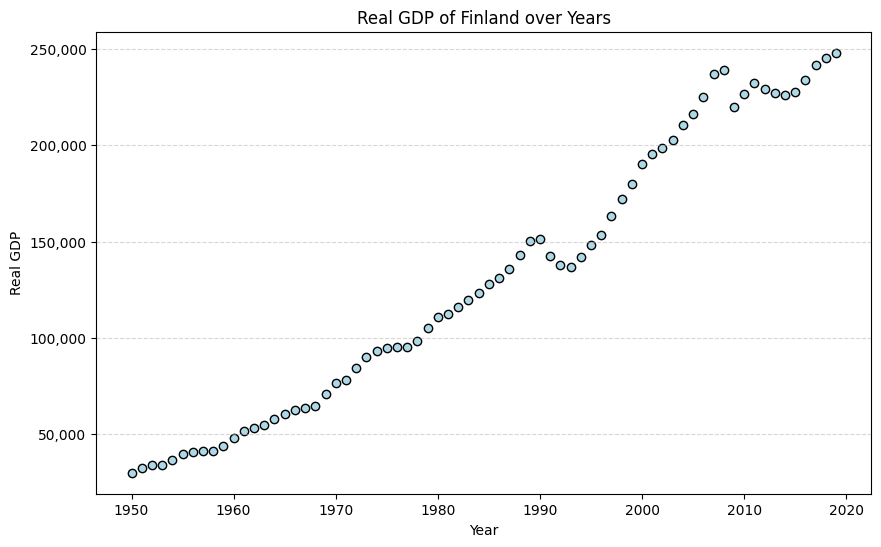

In [214]:
# Filter data for Finland
finland_data = renamed_combined_df[renamed_combined_df['country'] == 'Finland']

# Create the scatterplot
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figure size if needed

# Scatter plot with enhanced styling
ax.scatter(finland_data['year'], finland_data['Real GDP'],
           edgecolors='black',  # Add black border to data points
           facecolors='lightblue',  # Set lighter center color
           linewidths=1)  # Adjust border thickness

# Format y-axis with thousand comma separators
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Customize gridlines
ax.grid(True, axis='y', linestyle='--', alpha=0.5)  # Only horizontal gridlines, dashed and less prominent
# ax.grid(False, axis='x')  # Remove vertical gridlines completely (alternative)


ax.set_title('Real GDP of Finland over Years')
ax.set_xlabel('Year')
ax.set_ylabel('Real GDP')

plt.show()

## 3.2 Finland & US Side By Side Line Chart

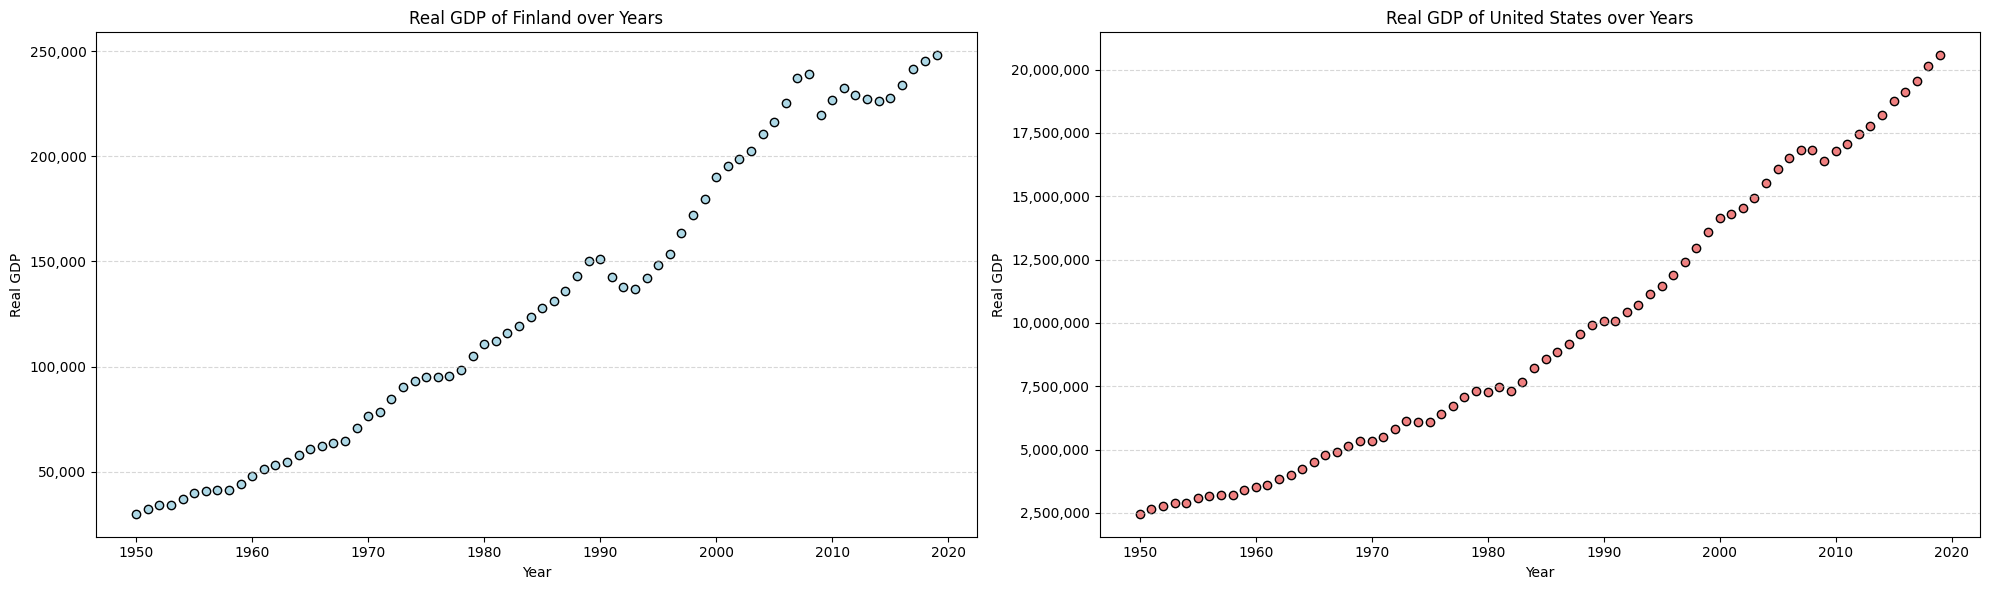

In [215]:
# Filter data for Finland and the US
finland_data = renamed_combined_df[renamed_combined_df['country'] == 'Finland']
us_data = renamed_combined_df[renamed_combined_df['country'] == 'United States']

# Create a figure and two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))  # Adjust figure size if needed

# --- Finland Plot (Left) ---
# Scatter plot with enhanced styling
ax1.scatter(finland_data['year'], finland_data['Real GDP'],
            edgecolors='black', facecolors='lightblue', linewidths=1)

# Format y-axis with thousand comma separators
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Customize gridlines
ax1.grid(True, axis='y', linestyle='--', alpha=0.5)

ax1.set_title('Real GDP of Finland over Years')
ax1.set_xlabel('Year')
ax1.set_ylabel('Real GDP')

# --- US Plot (Right) ---
# Scatter plot with enhanced styling
ax2.scatter(us_data['year'], us_data['Real GDP'],
            edgecolors='black', facecolors='lightcoral', linewidths=1)  # Different color for US

# Format y-axis with thousand comma separators
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Customize gridlines
ax2.grid(True, axis='y', linestyle='--', alpha=0.5)

ax2.set_title('Real GDP of United States over Years')
ax2.set_xlabel('Year')
ax2.set_ylabel('Real GDP')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


## 3.3 Improvemnts Made to Finland & US Charts

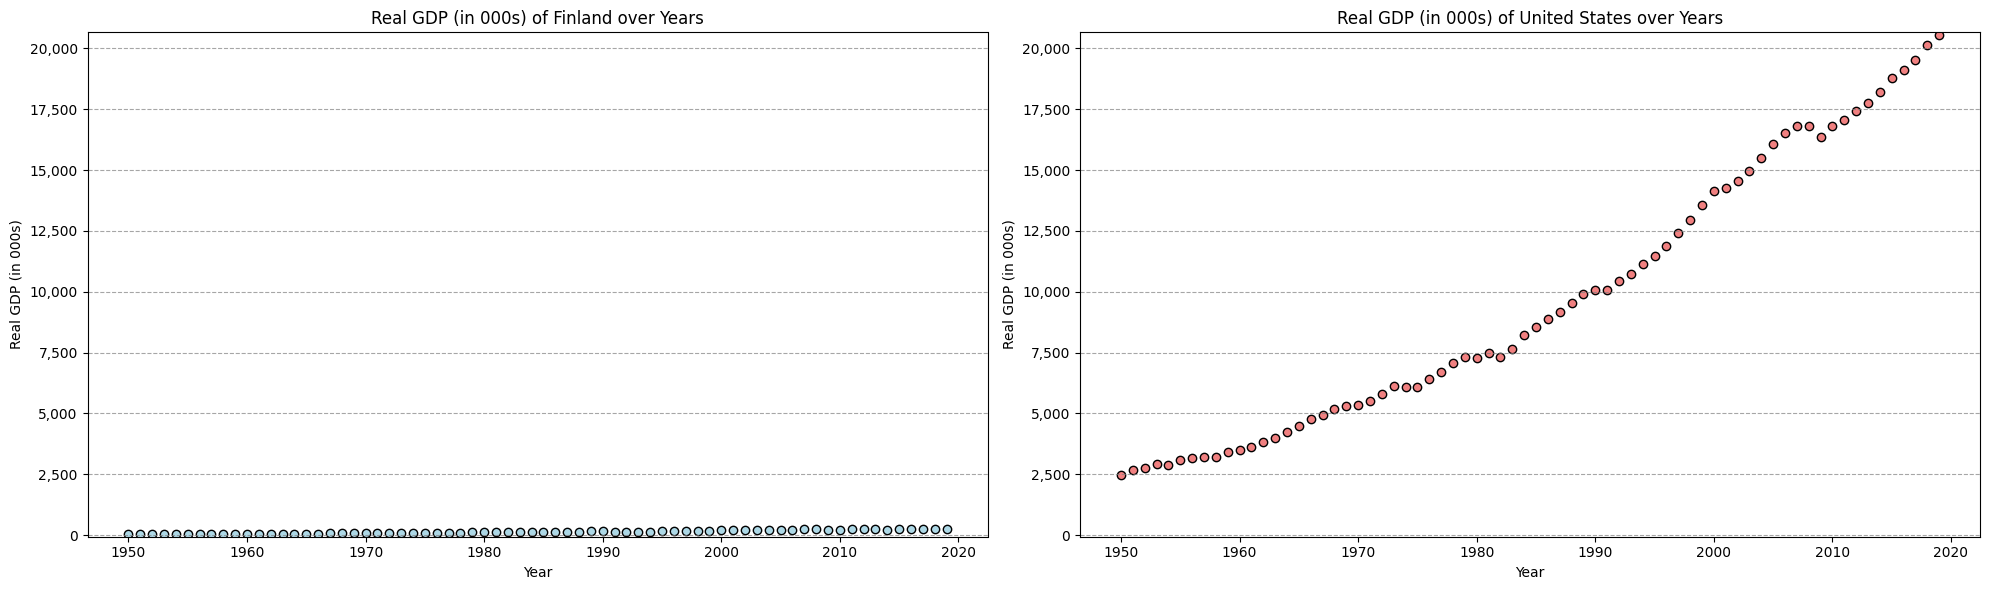

In [216]:
# Filter data for Finland and the US
finland_data = renamed_combined_df[renamed_combined_df['country'] == 'Finland']
us_data = renamed_combined_df[renamed_combined_df['country'] == 'United States']

# Create a figure and two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))  # Adjust figure size if needed

# --- Finland Plot (Left) ---
# Scatter plot with enhanced styling
ax1.scatter(finland_data['year'], finland_data['Real GDP'],
            edgecolors='black', facecolors='lightblue', linewidths=1)

# Format y-axis with thousand comma separators and indicate 'in thousands'
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x/1000), ',')))
ax1.set_ylabel('Real GDP (in 000s)')

# Customize gridlines - make horizontal lines darker
ax1.grid(True, axis='y', linestyle='--', alpha=0.7, color='gray')

ax1.set_title('Real GDP (in 000s) of Finland over Years')
ax1.set_xlabel('Year')


# --- US Plot (Right) ---
# Scatter plot with enhanced styling
ax2.scatter(us_data['year'], us_data['Real GDP'],
            edgecolors='black', facecolors='lightcoral', linewidths=1)  # Different color for US

# Format y-axis with thousand comma separators and indicate 'in thousands'
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x/1000), ',')))
ax2.set_ylabel('Real GDP (in 000s)')

# Customize gridlines - make horizontal lines darker
ax2.grid(True, axis='y', linestyle='--', alpha=0.7, color='gray')

ax2.set_title('Real GDP (in 000s) of United States over Years')
ax2.set_xlabel('Year')


# Set the same y-axis limits for both plots
# Get the min and max values for both countries
min_gdp = min(finland_data['Real GDP'].min(), us_data['Real GDP'].min())
max_gdp = max(finland_data['Real GDP'].max(), us_data['Real GDP'].max())

# Set the y-axis limits with some padding
ax1.set_ylim(min_gdp - 100000, max_gdp + 100000)
ax2.set_ylim(min_gdp - 100000, max_gdp + 100000)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

## 3.4 Finland & US Bar Charts Side By Side

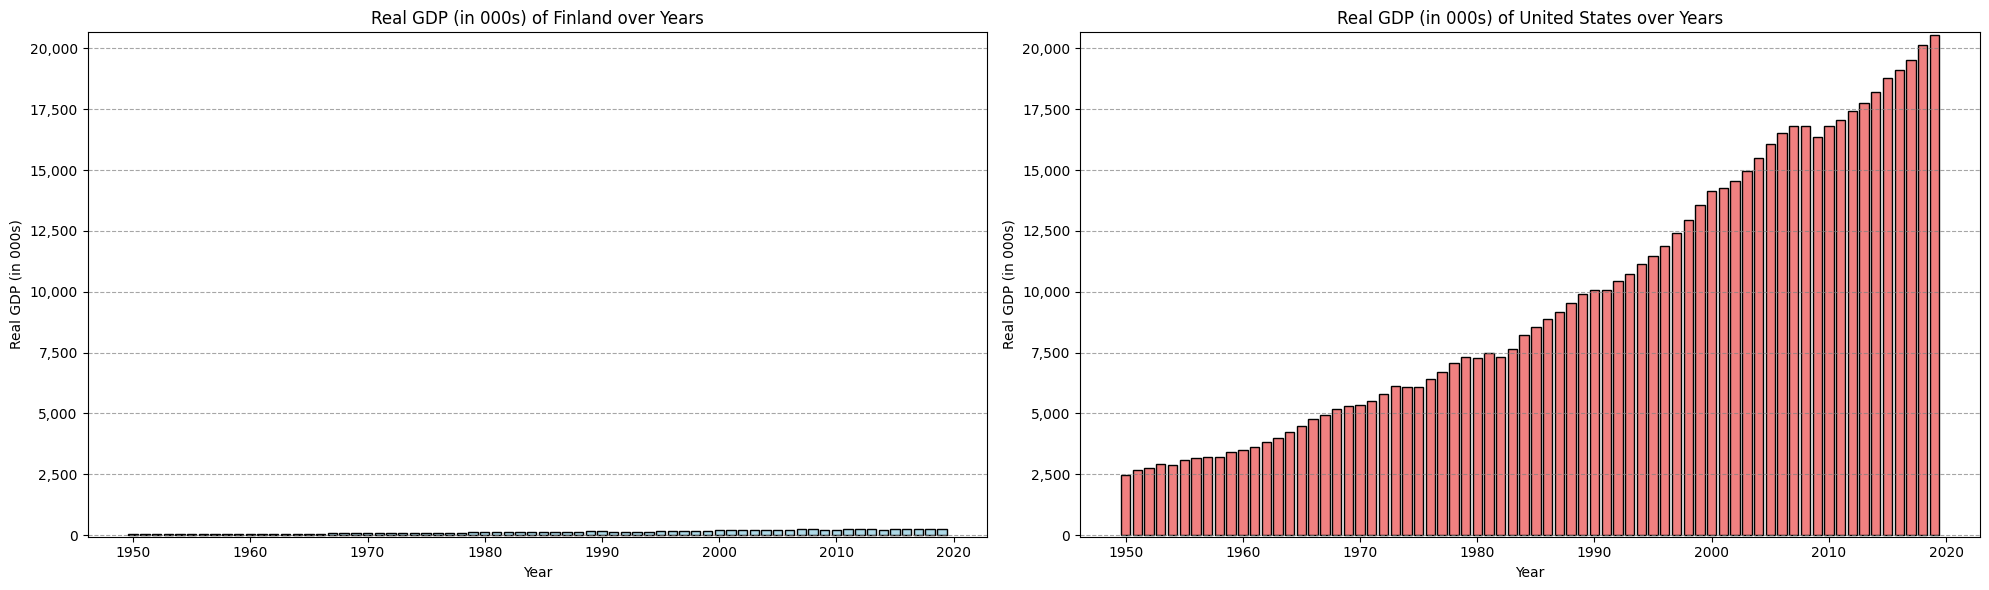

In [217]:
# Filter data for Finland and the US
finland_data = renamed_combined_df[renamed_combined_df['country'] == 'Finland']
us_data = renamed_combined_df[renamed_combined_df['country'] == 'United States']

# Create a figure and two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))  # Adjust figure size if needed

# --- Finland Plot (Left) ---
# Bar chart with enhanced styling
ax1.bar(finland_data['year'], finland_data['Real GDP'],
        edgecolor='black',  # Add black border to bars
        facecolor='lightblue',  # Set lighter center color
        linewidth=1)  # Adjust border thickness

# Format y-axis with thousand comma separators and indicate 'in thousands'
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x/1000), ',')))
ax1.set_ylabel('Real GDP (in 000s)')

# Customize gridlines - make horizontal lines darker
ax1.grid(True, axis='y', linestyle='--', alpha=0.7, color='gray')

ax1.set_title('Real GDP (in 000s) of Finland over Years')
ax1.set_xlabel('Year')


# --- US Plot (Right) ---
# Bar chart with enhanced styling
ax2.bar(us_data['year'], us_data['Real GDP'],
        edgecolor='black', facecolor='lightcoral', linewidth=1)  # Different color for US

# Format y-axis with thousand comma separators and indicate 'in thousands'
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x/1000), ',')))
ax2.set_ylabel('Real GDP (in 000s)')

# Customize gridlines - make horizontal lines darker
ax2.grid(True, axis='y', linestyle='--', alpha=0.7, color='gray')

ax2.set_title('Real GDP (in 000s) of United States over Years')
ax2.set_xlabel('Year')


# Set the same y-axis limits for both plots
# Get the min and max values for both countries
min_gdp = min(finland_data['Real GDP'].min(), us_data['Real GDP'].min())
max_gdp = max(finland_data['Real GDP'].max(), us_data['Real GDP'].max())

# Set the y-axis limits with some padding
ax1.set_ylim(min_gdp - 100000, max_gdp + 100000)
ax2.set_ylim(min_gdp - 100000, max_gdp + 100000)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

## 3.5 Lines Of Best Fit For US & Finland Scatter Plots

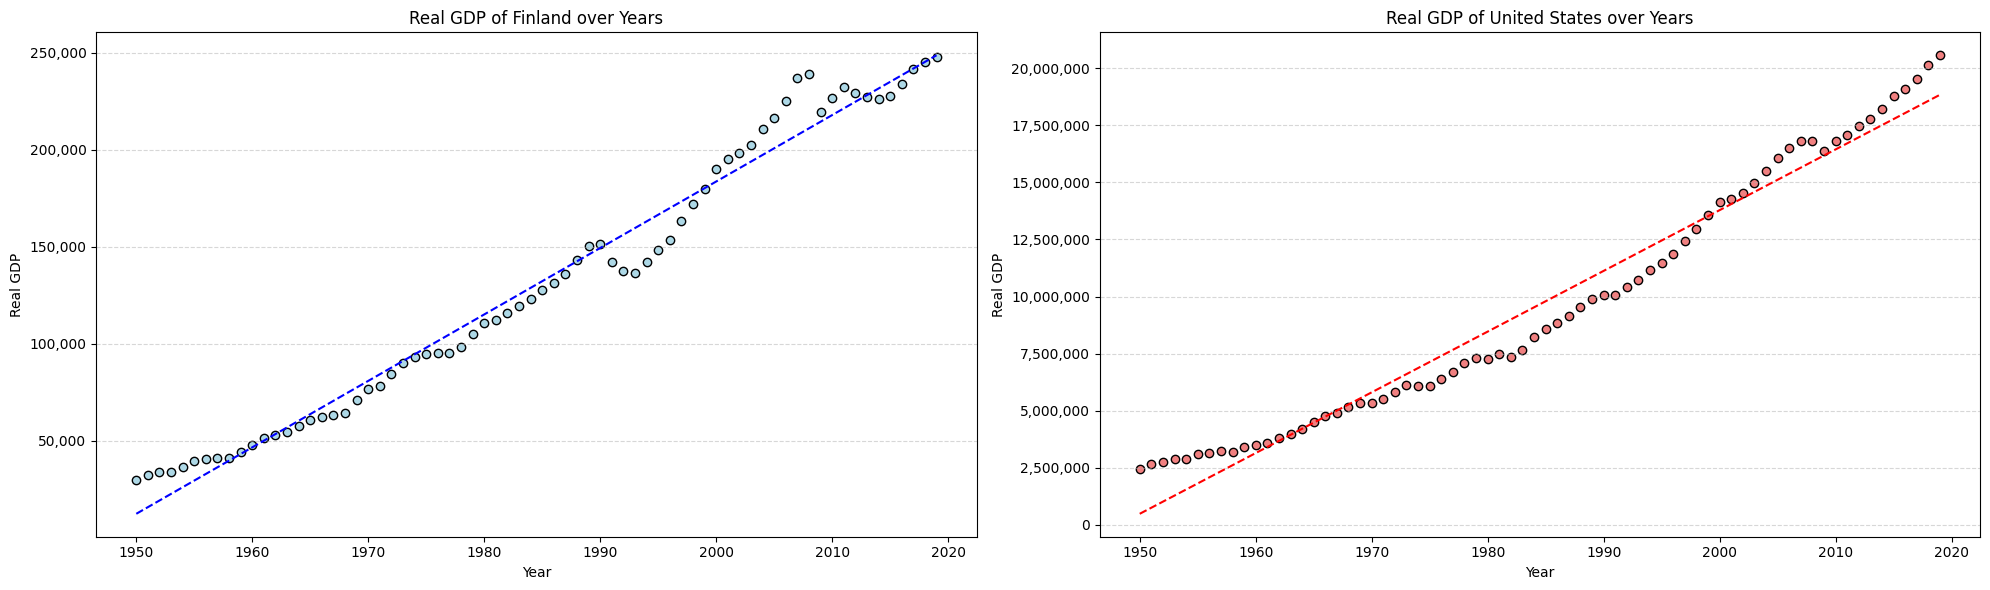

In [218]:
# Filter data for Finland and the US
finland_data = renamed_combined_df[renamed_combined_df['country'] == 'Finland']
us_data = renamed_combined_df[renamed_combined_df['country'] == 'United States']

# Create a figure and two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))  # Adjust figure size if needed

# --- Finland Plot (Left) ---
# Scatter plot with enhanced styling
ax1.scatter(finland_data['year'], finland_data['Real GDP'],
            edgecolors='black', facecolors='lightblue', linewidths=1)

# Format y-axis with thousand comma separators
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Customize gridlines
ax1.grid(True, axis='y', linestyle='--', alpha=0.5)

ax1.set_title('Real GDP of Finland over Years')
ax1.set_xlabel('Year')
ax1.set_ylabel('Real GDP')

# Add line of best fit (Finland)
x = finland_data['year']
y = finland_data['Real GDP']
m, b = np.polyfit(x, y, 1)  # Fit a 1st-degree polynomial (line)
ax1.plot(x, m*x + b, color='blue', linestyle='--')  # Plot the line


# --- US Plot (Right) ---
# Scatter plot with enhanced styling
ax2.scatter(us_data['year'], us_data['Real GDP'],
            edgecolors='black', facecolors='lightcoral', linewidths=1)  # Different color for US

# Format y-axis with thousand comma separators
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Customize gridlines
ax2.grid(True, axis='y', linestyle='--', alpha=0.5)

ax2.set_title('Real GDP of United States over Years')
ax2.set_xlabel('Year')
ax2.set_ylabel('Real GDP')

# Add line of best fit (US)
x = us_data['year']
y = us_data['Real GDP']
m, b = np.polyfit(x, y, 1)  # Fit a 1st-degree polynomial (line)
ax2.plot(x, m*x + b, color='red', linestyle='--')  # Plot the line

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

## 3.6 Identification Of Outliers

*   Calculated the residuals (difference between actual data points and the line of best fit) for both Finland and the US.
Identify outliers:
*   Used a threshold of 2 standard deviations from the residuals to identify outliers.

* Created outliers DataFrames to store the outlier data points



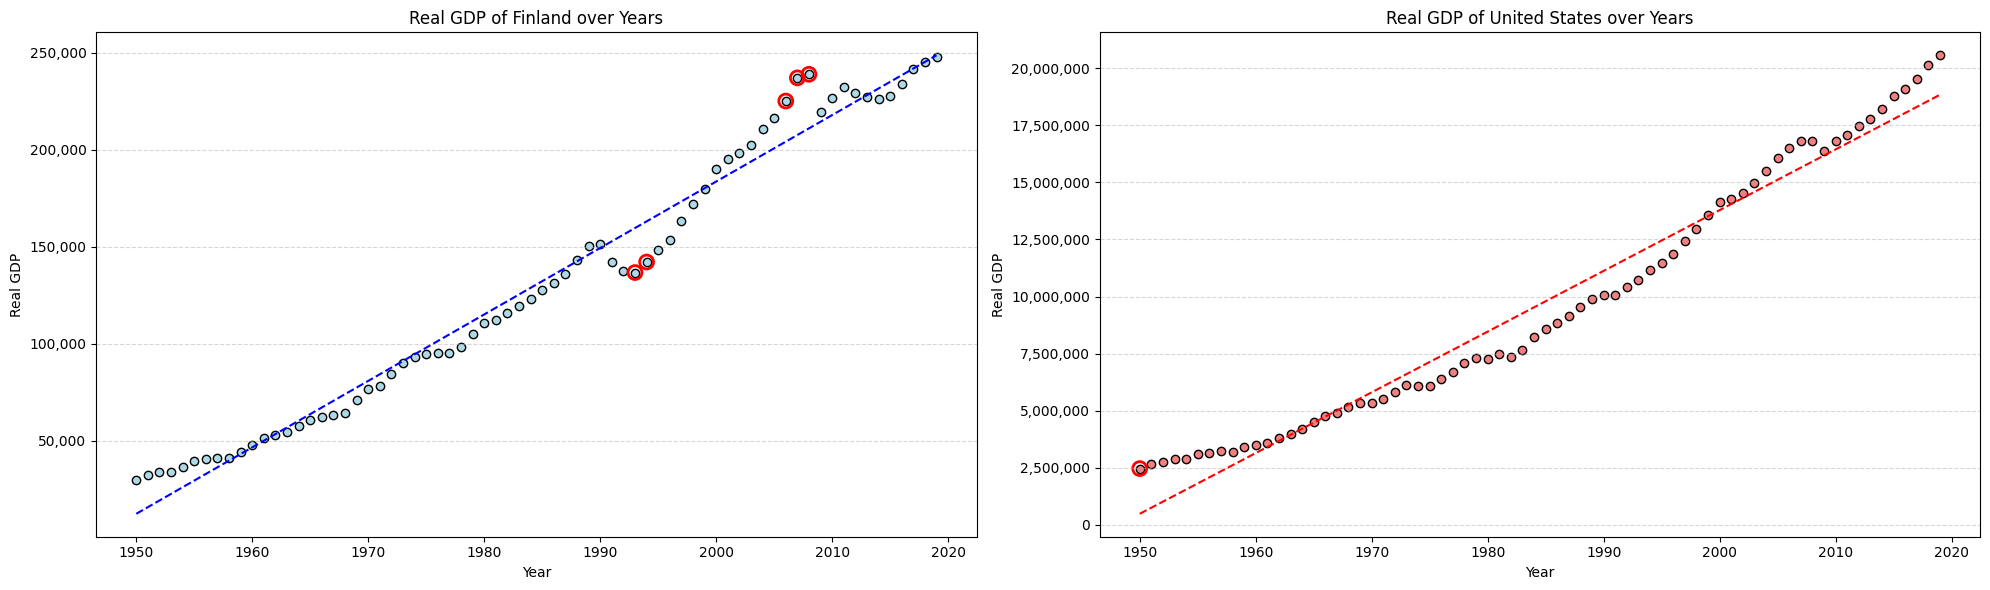

In [219]:
# Filter data for Finland and the US
finland_data = renamed_combined_df[renamed_combined_df['country'] == 'Finland']
us_data = renamed_combined_df[renamed_combined_df['country'] == 'United States']

# Create a figure and two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))  # Adjust figure size if needed

# --- Finland Plot (Left) ---
# Scatter plot with enhanced styling
ax1.scatter(finland_data['year'], finland_data['Real GDP'],
            edgecolors='black', facecolors='lightblue', linewidths=1)

# Format y-axis with thousand comma separators
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Customize gridlines
ax1.grid(True, axis='y', linestyle='--', alpha=0.5)

ax1.set_title('Real GDP of Finland over Years')
ax1.set_xlabel('Year')
ax1.set_ylabel('Real GDP')

# Add line of best fit (Finland)
x = finland_data['year']
y = finland_data['Real GDP']
m, b = np.polyfit(x, y, 1)  # Fit a 1st-degree polynomial (line)
ax1.plot(x, m*x + b, color='blue', linestyle='--')  # Plot the line

# Identify and circle outliers (Finland)
residuals = y - (m*x + b)
std_dev = np.std(residuals)
outliers = finland_data[(residuals > 2*std_dev) | (residuals < -2*std_dev)]  # Threshold: 2 standard deviations
ax1.scatter(outliers['year'], outliers['Real GDP'], s=100, facecolors='none', edgecolors='red', linewidths=2)


# --- US Plot (Right) ---
# Scatter plot with enhanced styling
ax2.scatter(us_data['year'], us_data['Real GDP'],
            edgecolors='black', facecolors='lightcoral', linewidths=1)  # Different color for US

# Format y-axis with thousand comma separators
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Customize gridlines
ax2.grid(True, axis='y', linestyle='--', alpha=0.5)

ax2.set_title('Real GDP of United States over Years')
ax2.set_xlabel('Year')
ax2.set_ylabel('Real GDP')

# Add line of best fit (US)
x = us_data['year']
y = us_data['Real GDP']
m, b = np.polyfit(x, y, 1)  # Fit a 1st-degree polynomial (line)
ax2.plot(x, m*x + b, color='red', linestyle='--')  # Plot the line

# Identify and circle outliers (US)
residuals = y - (m*x + b)
std_dev = np.std(residuals)
outliers = us_data[(residuals > 2*std_dev) | (residuals < -2*std_dev)]  # Threshold: 2 standard deviations
ax2.scatter(outliers['year'], outliers['Real GDP'], s=100, facecolors='none', edgecolors='red', linewidths=2)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

## 3.7 Linear & Quadratic Best Fit Line for US & Finland Scatter Plots

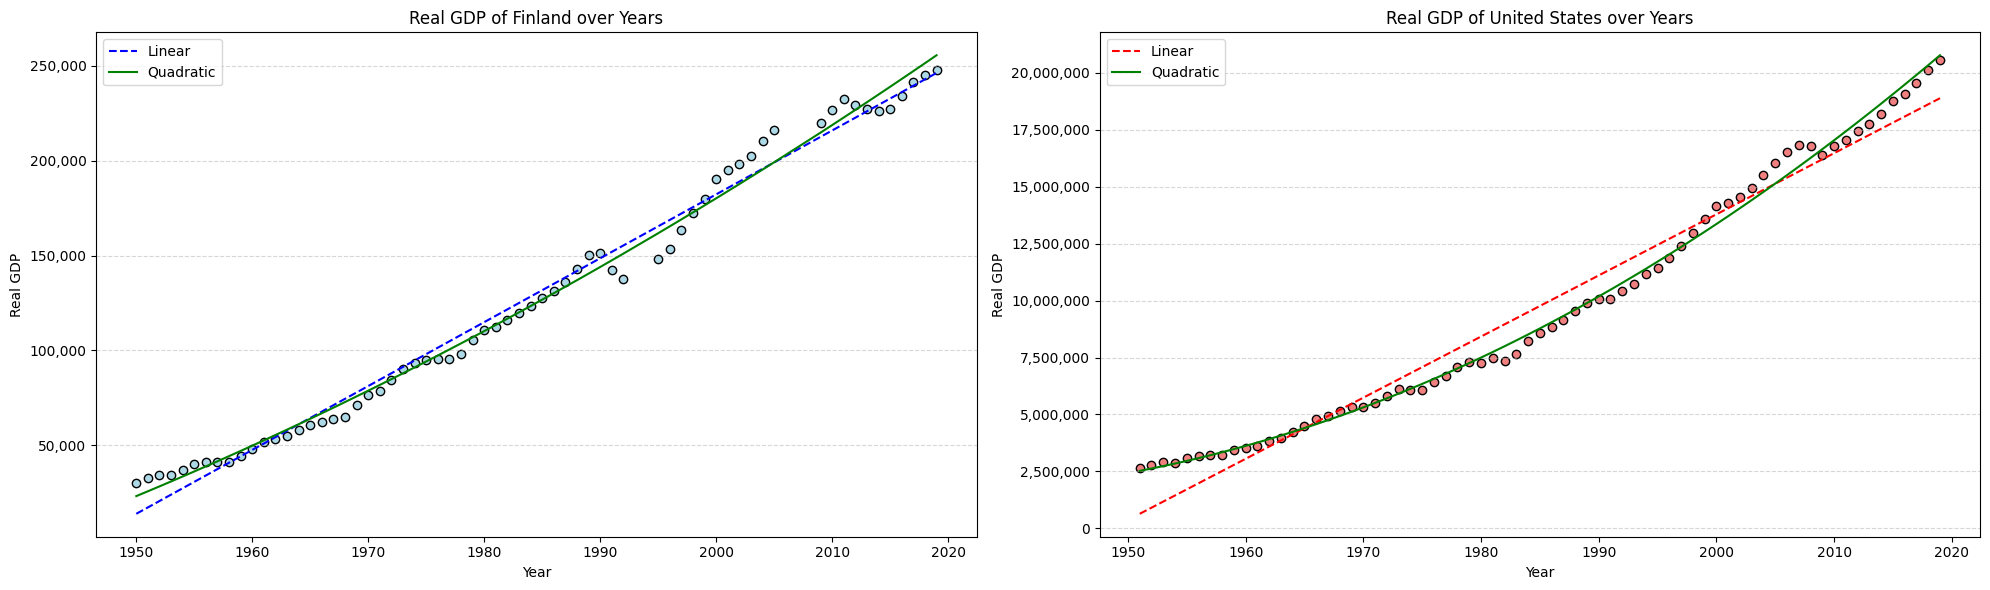

In [220]:
# Filter data for Finland and the US
finland_data = renamed_combined_df[renamed_combined_df['country'] == 'Finland']
us_data = renamed_combined_df[renamed_combined_df['country'] == 'United States']

# Create a figure and two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))  # Adjust figure size if needed

# --- Finland Plot (Left) ---
# Filter out outliers for Finland (using linear fit for outlier detection)
x = finland_data['year']
y = finland_data['Real GDP']
m, b = np.polyfit(x, y, 1)  # Fit a 1st-degree polynomial (line)
residuals = y - (m*x + b)
std_dev = np.std(residuals)
finland_data_no_outliers = finland_data[~((residuals > 2*std_dev) | (residuals < -2*std_dev))]

# Scatter plot with enhanced styling (no outliers)
ax1.scatter(finland_data_no_outliers['year'], finland_data_no_outliers['Real GDP'],
            edgecolors='black', facecolors='lightblue', linewidths=1)

# Format y-axis with thousand comma separators
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Customize gridlines
ax1.grid(True, axis='y', linestyle='--', alpha=0.5)

ax1.set_title('Real GDP of Finland over Years')
ax1.set_xlabel('Year')
ax1.set_ylabel('Real GDP')

# Add first-degree line of best fit (Finland)
x = finland_data_no_outliers['year']  # Use data without outliers
y = finland_data_no_outliers['Real GDP'] # Use data without outliers
m, b = np.polyfit(x, y, 1)  # Fit a 1st-degree polynomial (line)
ax1.plot(x, m*x + b, color='blue', linestyle='--', label='Linear')  # Plot the line, add label

# Add second-degree line of best fit (Finland)
coeffs = np.polyfit(x, y, 2)  # Fit a 2nd-degree polynomial
curve = np.poly1d(coeffs)  # Create a polynomial object
ax1.plot(x, curve(x), color='green', linestyle='-', label='Quadratic')  # Plot the curve, add label

ax1.legend()  # Show legend


# --- US Plot (Right) ---
# Filter out outliers for US (using linear fit for outlier detection)
x = us_data['year']
y = us_data['Real GDP']
m, b = np.polyfit(x, y, 1)  # Fit a 1st-degree polynomial (line)
residuals = y - (m*x + b)
std_dev = np.std(residuals)
us_data_no_outliers = us_data[~((residuals > 2*std_dev) | (residuals < -2*std_dev))]

# Scatter plot with enhanced styling (no outliers)
ax2.scatter(us_data_no_outliers['year'], us_data_no_outliers['Real GDP'],
            edgecolors='black', facecolors='lightcoral', linewidths=1)  # Different color for US

# Format y-axis with thousand comma separators
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Customize gridlines
ax2.grid(True, axis='y', linestyle='--', alpha=0.5)

ax2.set_title('Real GDP of United States over Years')
ax2.set_xlabel('Year')
ax2.set_ylabel('Real GDP')

# Add first-degree line of best fit (US)
x = us_data_no_outliers['year'] # Use data without outliers
y = us_data_no_outliers['Real GDP'] # Use data without outliers
m, b = np.polyfit(x, y, 1)  # Fit a 1st-degree polynomial (line)
ax2.plot(x, m*x + b, color='red', linestyle='--', label='Linear')  # Plot the line, add label

# Add second-degree line of best fit (US)
coeffs = np.polyfit(x, y, 2)  # Fit a 2nd-degree polynomial
curve = np.poly1d(coeffs)  # Create a polynomial object
ax2.plot(x, curve(x), color='green', linestyle='-', label='Quadratic')  # Plot the curve, add label

ax2.legend()  # Show legend

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

## 3.8 Identification of Outliers Based On New Best Fit Line

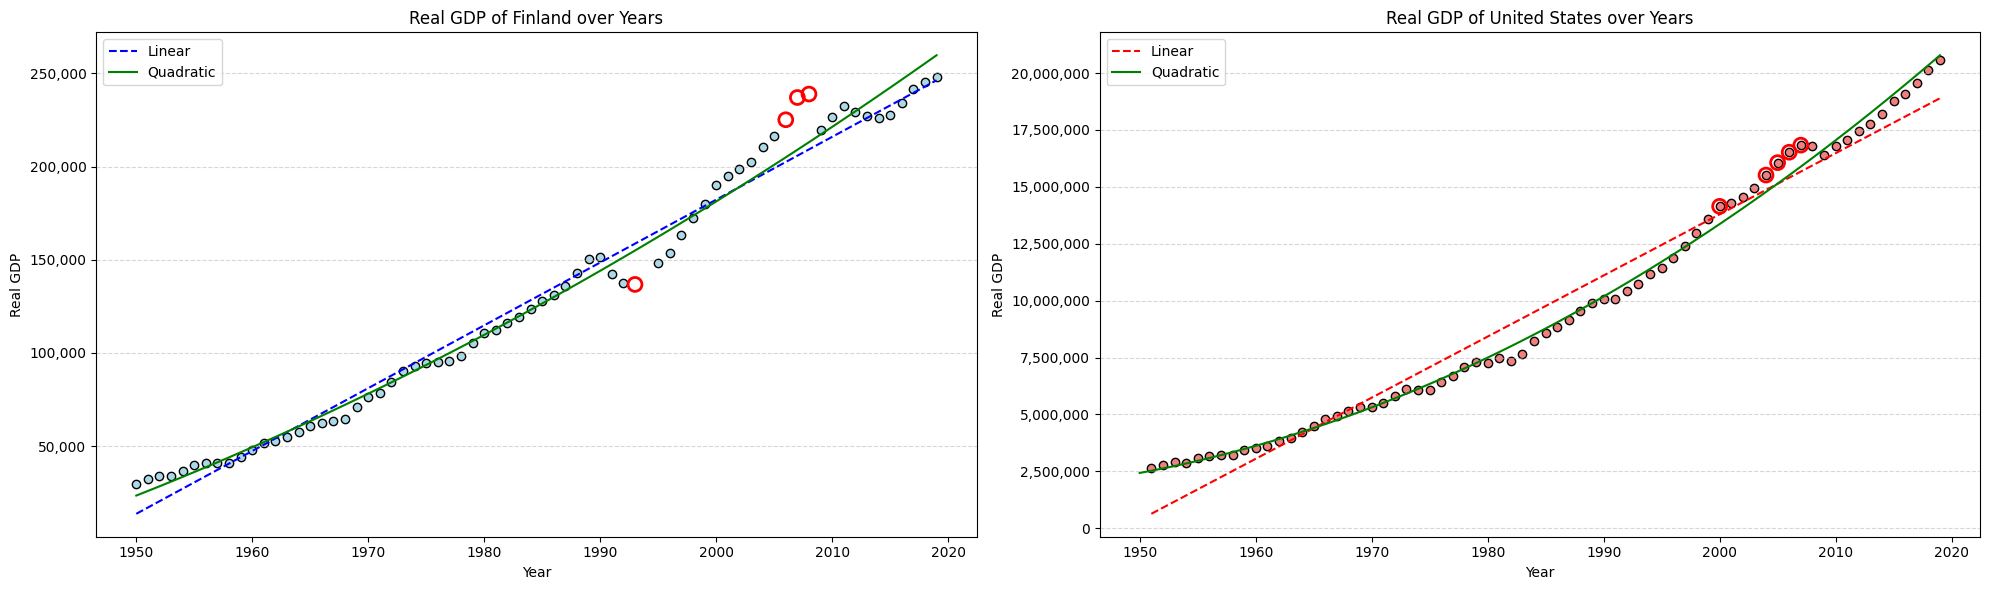

In [222]:
# Filter data for Finland and the US
finland_data = renamed_combined_df[renamed_combined_df['country'] == 'Finland']
us_data = renamed_combined_df[renamed_combined_df['country'] == 'United States']

# Create a figure and two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))  # Adjust figure size if needed

# --- Finland Plot (Left) ---
# Filter out outliers for Finland (using linear fit for outlier detection - for initial scatter plot only)
x_fin = finland_data['year']
y_fin = finland_data['Real GDP']
m_fin, b_fin = np.polyfit(x_fin, y_fin, 1)
residuals_fin = y_fin - (m_fin * x_fin + b_fin)
std_dev_fin = np.std(residuals_fin)
finland_data_no_outliers = finland_data[~((residuals_fin > 2 * std_dev_fin) | (residuals_fin < -2 * std_dev_fin))]

# Scatter plot with enhanced styling (no outliers for initial scatter)
ax1.scatter(finland_data_no_outliers['year'], finland_data_no_outliers['Real GDP'],
            edgecolors='black', facecolors='lightblue', linewidths=1)

# Format y-axis with thousand comma separators
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Customize gridlines
ax1.grid(True, axis='y', linestyle='--', alpha=0.5)

ax1.set_title('Real GDP of Finland over Years')
ax1.set_xlabel('Year')
ax1.set_ylabel('Real GDP')

# Add first-degree line of best fit (Finland)
x_fin_no_outliers = finland_data_no_outliers['year']
y_fin_no_outliers = finland_data_no_outliers['Real GDP']
m_fin_no_outliers, b_fin_no_outliers = np.polyfit(x_fin_no_outliers, y_fin_no_outliers, 1)
ax1.plot(x_fin_no_outliers, m_fin_no_outliers * x_fin_no_outliers + b_fin_no_outliers, color='blue', linestyle='--', label='Linear')

# Add second-degree line of best fit (Finland)
coeffs_fin = np.polyfit(x_fin, y_fin, 2)  # Fit quadratic to all data for the line
curve_fin = np.poly1d(coeffs_fin)
ax1.plot(x_fin, curve_fin(x_fin), color='green', linestyle='-', label='Quadratic')

# Identify and circle outliers based on the quadratic fit (Finland)
residuals_quad_fin = y_fin - curve_fin(x_fin)  # Residuals from quadratic fit
std_dev_quad_fin = np.std(residuals_quad_fin)
outliers_quad_fin = finland_data[(residuals_quad_fin > 2 * std_dev_quad_fin) | (residuals_quad_fin < -2 * std_dev_quad_fin)]
ax1.scatter(outliers_quad_fin['year'], outliers_quad_fin['Real GDP'], s=100, facecolors='none', edgecolors='red', linewidths=2)

ax1.legend()

# --- US Plot (Right) ---
# Similar logic for US plot, using x_us, y_us, etc.
x_us = us_data['year']
y_us = us_data['Real GDP']
m_us, b_us = np.polyfit(x_us, y_us, 1)
residuals_us = y_us - (m_us * x_us + b_us)
std_dev_us = np.std(residuals_us)
us_data_no_outliers = us_data[~((residuals_us > 2 * std_dev_us) | (residuals_us < -2 * std_dev_us))]

# Scatter plot with enhanced styling (no outliers for initial scatter)
ax2.scatter(us_data_no_outliers['year'], us_data_no_outliers['Real GDP'],
            edgecolors='black', facecolors='lightcoral', linewidths=1)  # Different color for US


# Format y-axis with thousand comma separators
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Customize gridlines
ax2.grid(True, axis='y', linestyle='--', alpha=0.5)

ax2.set_title('Real GDP of United States over Years')
ax2.set_xlabel('Year')
ax2.set_ylabel('Real GDP')

# Add first-degree line of best fit (US)
x_us_no_outliers = us_data_no_outliers['year']
y_us_no_outliers = us_data_no_outliers['Real GDP']
m_us_no_outliers, b_us_no_outliers = np.polyfit(x_us_no_outliers, y_us_no_outliers, 1)
ax2.plot(x_us_no_outliers, m_us_no_outliers * x_us_no_outliers + b_us_no_outliers, color='red', linestyle='--', label='Linear')

# Add second-degree line of best fit (US)
coeffs_us = np.polyfit(x_us, y_us, 2)  # Fit quadratic to all data for the line
curve_us = np.poly1d(coeffs_us)
ax2.plot(x_us, curve_us(x_us), color='green', linestyle='-', label='Quadratic')

# Identify and circle outliers based on the quadratic fit (US)
residuals_quad_us = y_us - curve_us(x_us)  # Residuals from quadratic fit
std_dev_quad_us = np.std(residuals_quad_us)
outliers_quad_us = us_data[(residuals_quad_us > 2 * std_dev_quad_us) | (residuals_quad_us < -2 * std_dev_quad_us)]
ax2.scatter(outliers_quad_us['year'], outliers_quad_us['Real GDP'], s=100, facecolors='none', edgecolors='red', linewidths=2)

ax2.legend()

plt.tight_layout()
plt.show()

## 3.9 Bar Chart of The Top 10 Countries With Greatest Growth Rate In Dataset

<ipython-input-223-330fde0b2b40>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(top_10_countries.index, fontsize=10)  # Adjust fontsize if needed


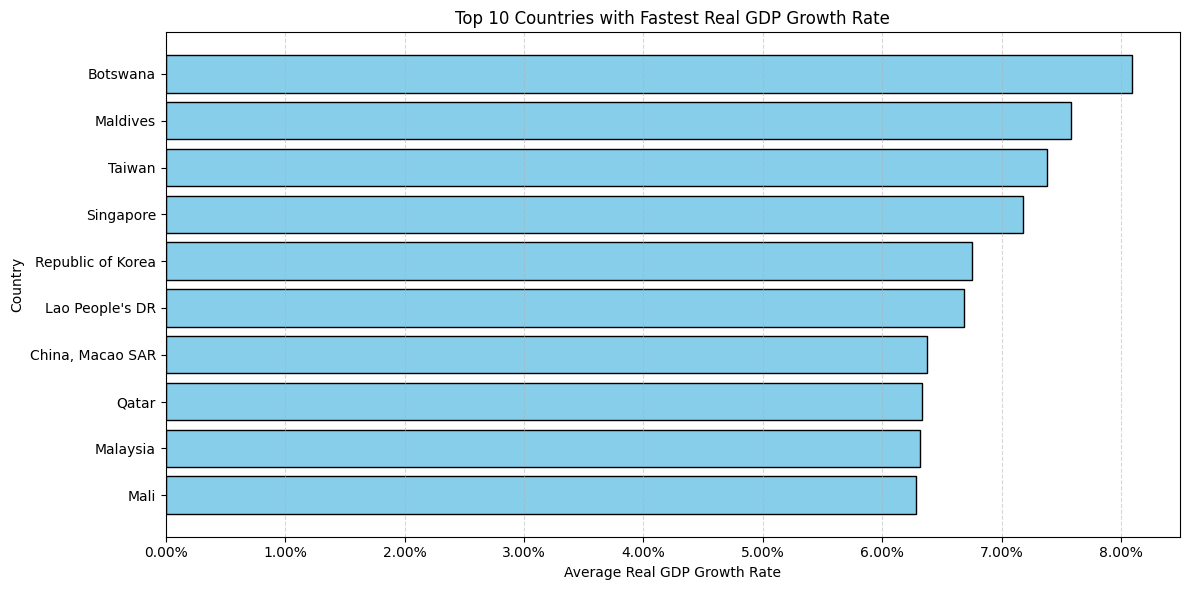

In [223]:
# Calculate Real GDP growth rate for each country
renamed_combined_df['Real GDP Growth Rate'] = renamed_combined_df.groupby('country')['Real GDP'].pct_change()

# Calculate average growth rate for each country
average_growth_rates = renamed_combined_df.groupby('country')['Real GDP Growth Rate'].mean()

# Get top 10 countries with fastest growth rate
top_10_countries = average_growth_rates.nlargest(10).sort_values(ascending=True)  # Sort in ascending order for bar chart

# Create bar chart
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust figure size if needed
ax.barh(top_10_countries.index, top_10_countries.values, color='skyblue', edgecolor='black')

# Format y-axis labels
ax.set_yticklabels(top_10_countries.index, fontsize=10)  # Adjust fontsize if needed

# Format x-axis labels as percentages
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=2))  # xmax=1 for percentages

# Add title and labels
ax.set_title('Top 10 Countries with Fastest Real GDP Growth Rate')
ax.set_xlabel('Average Real GDP Growth Rate')
ax.set_ylabel('Country')

# Add gridlines
ax.grid(True, axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

## 3.10 Bar Chart of The Top 10 Countries With Highest Real GDP Growth

<ipython-input-224-256595e3a4d7>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(top_10_countries.index, fontsize=10)


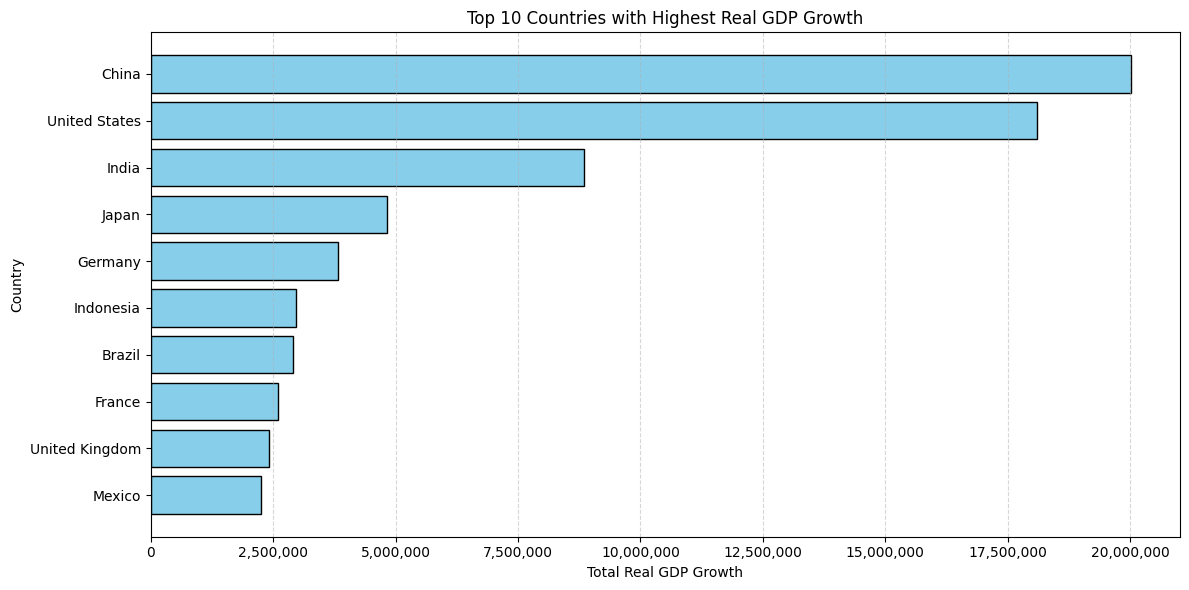

In [224]:
# Calculate the total Real GDP growth for each country
renamed_combined_df['Total Real GDP Growth'] = renamed_combined_df.groupby('country')['Real GDP'].transform(lambda x: x.iloc[-1] - x.iloc[0])

# Group by country and get the average total growth
average_total_growth = renamed_combined_df.groupby('country')['Total Real GDP Growth'].mean()

# Get the top 10 countries with the highest average total growth
top_10_countries = average_total_growth.nlargest(10).sort_values(ascending=True)

# Create a bar chart
fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(top_10_countries.index, top_10_countries.values, color='skyblue', edgecolor='black')

# Format y-axis labels
ax.set_yticklabels(top_10_countries.index, fontsize=10)

# Format x-axis with thousand comma separators
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Add title and labels
ax.set_title('Top 10 Countries with Highest Real GDP Growth')
ax.set_xlabel('Total Real GDP Growth')
ax.set_ylabel('Country')

# Add gridlines
ax.grid(True, axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

## 3.11 Scatter Plot of Real GDP/Worker All Eurozone Economies

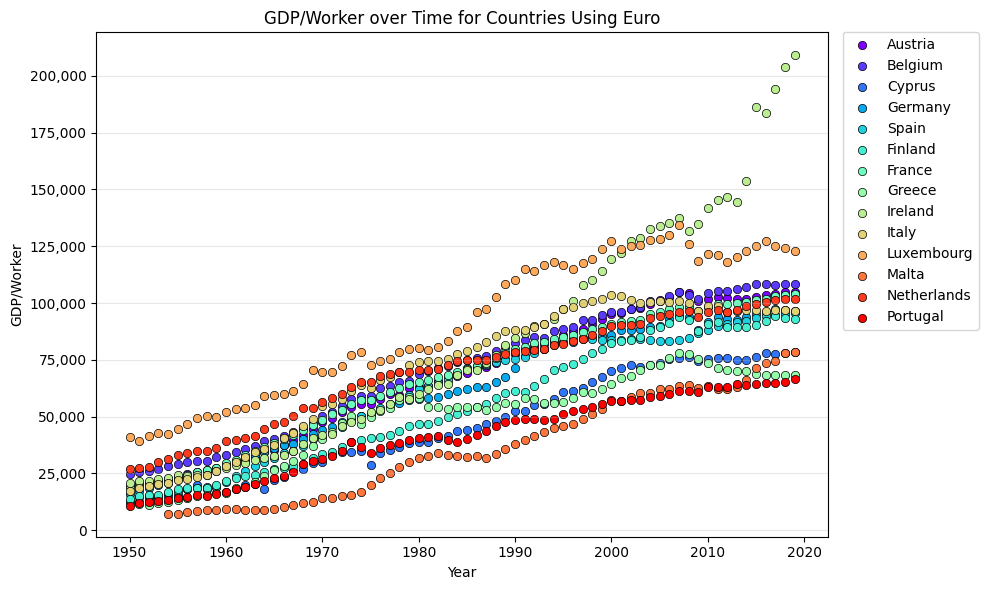

In [225]:
# Calculate GDP per worker
renamed_combined_df['GDP/Worker'] = renamed_combined_df['Real GDP'] / renamed_combined_df['Labour']

# Filter data where currency_unit is Euro
euro_data = renamed_combined_df[renamed_combined_df['currency_unit'] == 'Euro']

# Get unique countries and assign a color to each
countries = euro_data['country'].unique()
colors = cm.rainbow(np.linspace(0, 1, len(countries)))  # Use rainbow colormap
country_color_map = dict(zip(countries, colors))

# Create the scatterplot with different colors for each country
fig, ax = plt.subplots(figsize=(10, 6))
for country, color in country_color_map.items():
    country_data = euro_data[euro_data['country'] == country]
    ax.scatter(country_data['year'], country_data['GDP/Worker'],
               facecolor=color, edgecolor='black', linewidth=0.5, label=country)

ax.set_title('GDP/Worker over Time for Countries Using Euro')
ax.set_xlabel('Year')
ax.set_ylabel('GDP/Worker')

# Remove vertical grid lines and make horizontal ones faint
ax.grid(axis='y', alpha=0.3)

# Format y-axis with comma separators
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

# Add legend
ax.legend(loc="upper left", bbox_to_anchor=(1.02, 1), borderaxespad=0)  # Place legend outside plot area

plt.tight_layout()
plt.show()

## 3.12 Scatter Plot of Real GDP/Worker All Asian Economies

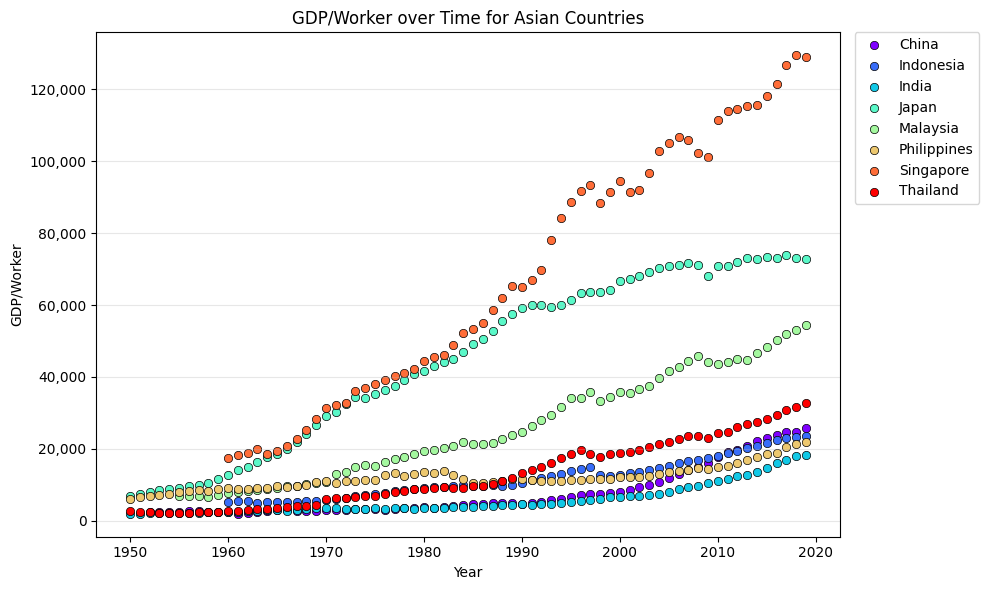

In [163]:
# Calculate GDP per worker
renamed_combined_df['GDP/Worker'] = renamed_combined_df['Real GDP'] / renamed_combined_df['Labour']

# Filter data for countries in Asia (You'll need to define how you identify Asian countries)
asia_data = renamed_combined_df[renamed_combined_df['country'].isin(['China', 'India', 'Japan', 'South Korea', 'Indonesia',  # Add more countries
                                                                      'Malaysia', 'Philippines', 'Thailand', 'Vietnam', 'Singapore'])]  # Example list

# Get unique countries and assign a color to each
countries = asia_data['country'].unique()
colors = cm.rainbow(np.linspace(0, 1, len(countries)))  # Use rainbow colormap
country_color_map = dict(zip(countries, colors))

# Create the scatterplot with different colors for each country
fig, ax = plt.subplots(figsize=(10, 6))
for country, color in country_color_map.items():
    country_data = asia_data[asia_data['country'] == country]
    ax.scatter(country_data['year'], country_data['GDP/Worker'],
               facecolor=color, edgecolor='black', linewidth=0.5, label=country)

ax.set_title('GDP/Worker over Time for Asian Countries')  # Change title
ax.set_xlabel('Year')
ax.set_ylabel('GDP/Worker')

# Remove vertical grid lines and make horizontal ones faint
ax.grid(axis='y', alpha=0.3)

# Format y-axis with comma separators
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

# Add legend
ax.legend(loc="upper left", bbox_to_anchor=(1.02, 1), borderaxespad=0)  # Place legend outside plot area

plt.tight_layout()
plt.show()

## 3.13 Scatter Plot of Real GDP/Worker All Middle Eastern Economies

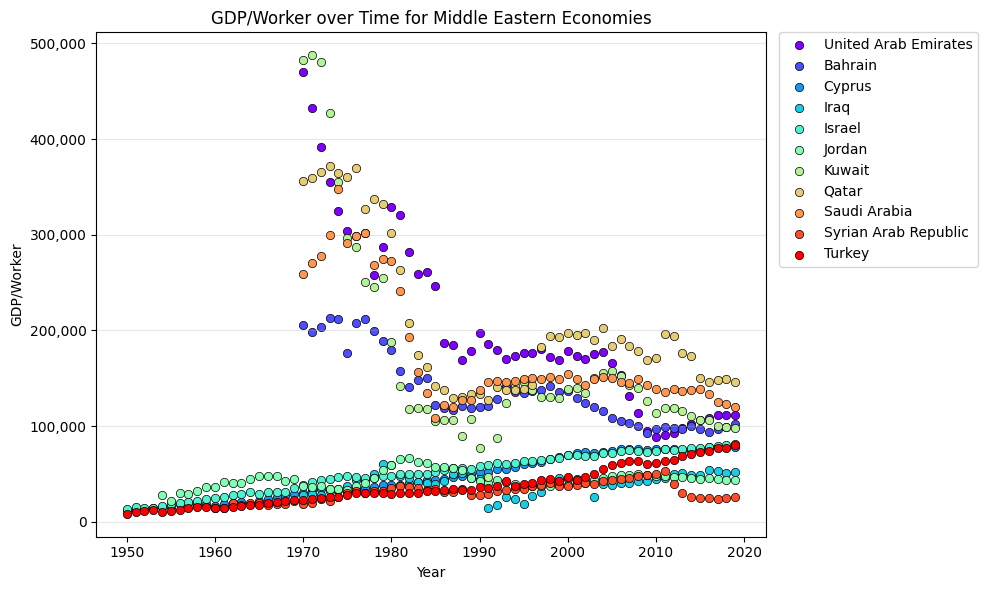

In [226]:
# Calculate GDP per worker
renamed_combined_df['GDP/Worker'] = renamed_combined_df['Real GDP'] / renamed_combined_df['Labour']

# Filter data for countries in the Middle East
# (You'll need to define how you identify Middle Eastern countries)
middle_east_data = renamed_combined_df[renamed_combined_df['country'].isin([
    'Bahrain', 'Cyprus', 'Egypt, Arab Rep.', 'Iran, Islamic Rep.', 'Iraq',
    'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Oman', 'Qatar',
    'Saudi Arabia', 'Syrian Arab Republic', 'Turkey', 'United Arab Emirates',
    'Yemen, Rep.'  # Add more countries if needed
])]

# Get unique countries and assign a color to each
countries = middle_east_data['country'].unique()
colors = cm.rainbow(np.linspace(0, 1, len(countries)))  # Use rainbow colormap
country_color_map = dict(zip(countries, colors))

# Create the scatterplot with different colors for each country
fig, ax = plt.subplots(figsize=(10, 6))
for country, color in country_color_map.items():
    country_data = middle_east_data[middle_east_data['country'] == country]
    ax.scatter(country_data['year'], country_data['GDP/Worker'],  # Use 'GDP/Worker' here
               facecolor=color, edgecolor='black', linewidth=0.5, label=country)

ax.set_title('GDP/Worker over Time for Middle Eastern Economies')  # Change title
ax.set_xlabel('Year')
ax.set_ylabel('GDP/Worker')  # Change y-axis label

# Remove vertical grid lines and make horizontal ones faint
ax.grid(axis='y', alpha=0.3)

# Format y-axis with comma separators
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

# Add legend
ax.legend(loc="upper left", bbox_to_anchor=(1.02, 1), borderaxespad=0)  # Place legend outside plot area

plt.tight_layout()
plt.show()

# 4: Transforming Data & Running Regressions

## 4.1 New DataFrame with Average Variables

In [228]:
# Convert 'year' column to datetime
renamed_combined_df['year'] = pd.to_datetime(renamed_combined_df['year'], format='%Y')

# Variables to average
variables_to_average = ['Real GDP', 'Capital', 'Labour', 'Human Capital', 'GDP/Worker']  # Add or remove variables as needed

# Create a new DataFrame to store the averages
averaged_df = pd.DataFrame()

# Group by country and 5-year intervals
for country, group in renamed_combined_df.groupby(['country', pd.Grouper(key='year', freq='5Y')]):
    # Calculate the average for each variable
    averages = group[variables_to_average].mean()

    # Add the country and year to the averages
    averages['country'] = country[0]  # Country name
    averages['year'] = country[1].year  # Year of the 5-year interval

    # Append the averages to the new DataFrame
    averaged_df = pd.concat([averaged_df, averages.to_frame().T], ignore_index=True)

# Display the averaged DataFrame
averaged_df

<ipython-input-228-d6a589283447>:11: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  for country, group in renamed_combined_df.groupby(['country', pd.Grouper(key='year', freq='5Y')]):


,Real GDP,Capital,Labour,Human Capital,GDP/Worker,country,year
0,9084.574219,45241.148438,0.769157,1.558792,11811.075622,Albania,1970
1,10236.838477,52583.132031,0.842627,1.644833,12141.740925,Albania,1975
2,12446.205859,67114.334375,0.972481,1.809336,12791.068845,Albania,1980
3,14547.015625,85250.926562,1.135485,2.100332,12824.154801,Albania,1985
4,15654.875781,104053.8375,1.294762,2.409648,12097.288596,Albania,1990
...,...,...,...,...,...,...,...
1659,23755.493359,57328.367969,5.029378,2.040088,4724.08462,Zimbabwe,2000
1660,19375.21875,59790.1375,5.30347,2.180547,3661.060136,Zimbabwe,2005
1661,20636.875195,54717.789062,5.623492,2.325999,3657.134986,Zimbabwe,2010
1662,39401.650781,61832.760156,6.124705,2.503039,6426.453149,Zimbabwe,2015


## 4.2 New DataFrame with Year Bins

In [229]:
# Define the variables you want to average
variables_to_average = ['Real GDP', 'Capital', 'Labour', 'Human Capital', 'GDP/Worker']

# 1. Group by Country
grouped = renamed_combined_df.groupby('country')

# 2. Get Minimum and Maximum Years
min_years = grouped['year'].min().dt.year.to_dict()  # Extract year from datetime
max_years = grouped['year'].max().dt.year.to_dict()  # Extract year from datetime

# 3. Define and Apply Bins
renamed_combined_df['year_group'] = renamed_combined_df.apply(
    lambda row: pd.cut(
        [row['year'].year],  # Use year attribute to get the year as an integer
        bins=pd.interval_range(
            start=min_years[row['country']],
            end=max_years[row['country']] + 5,  # Ensure the last year is included
            freq=5
        ),
        include_lowest=True  # Include the lower bound of the first interval
    )[0],
    axis=1
)

# 4. Group and Aggregate
averaged_df = renamed_combined_df.groupby(['country', 'year_group'])[variables_to_average].mean().reset_index()

# 5. Extract the start year from the interval and rename the column
averaged_df['year'] = averaged_df['year_group'].apply(lambda x: x.left)
averaged_df = averaged_df.drop(columns=['year_group'])

# Display the new DataFrame
averaged_df

,country,Real GDP,Capital,Labour,Human Capital,GDP/Worker,year
0,Albania,10236.838477,52583.132031,0.842627,1.644833,12141.740925,1970.0
1,Albania,12446.205859,67114.334375,0.972481,1.809336,12791.068845,1975.0
2,Albania,14547.015625,85250.926562,1.135485,2.100332,12824.154801,1980.0
3,Albania,15654.875781,104053.837500,1.294762,2.409648,12097.288596,1985.0
4,Albania,11515.844727,107700.073438,1.090196,2.514883,10700.784904,1990.0
...,...,...,...,...,...,...,...
1541,Zimbabwe,23798.831250,56915.134375,5.026606,2.025835,4735.023368,1994.0
1542,Zimbabwe,20233.415234,60007.400000,5.226993,2.142857,3878.956219,1999.0
1543,Zimbabwe,18202.645508,55015.761719,5.562493,2.302926,3268.086313,2004.0
1544,Zimbabwe,36934.174609,60090.527344,5.996609,2.460630,6143.855106,2009.0


## 4.3 Log All Variables

In [230]:
# Create a copy of the original DataFrame to avoid modifying it directly
transformed_df = renamed_combined_df.copy()

# Drop 'GDP/Worker' column
transformed_df = transformed_df.drop(columns=['GDP/Worker'])

# Drop 'Real GDP Growth Rate' column
transformed_df = transformed_df.drop(columns=['Real GDP Growth Rate'])

# Drop 'Total Real GDP Growth' column
transformed_df = transformed_df.drop(columns=['Total Real GDP Growth'])


# Create log variables
transformed_df['log_Real_GDP'] = np.log(transformed_df['Real GDP'])
transformed_df['log_Capital'] = np.log(transformed_df['Capital'])
transformed_df['log_Labour'] = np.log(transformed_df['Labour'])
transformed_df['log_Human_Capital'] = np.log(transformed_df['Human Capital'])

# Display the transformed DataFrame
transformed_df

,country,currency_unit,year,Real GDP,Capital,Labour,Human Capital,year_group,log_Real_GDP,log_Capital,log_Labour,log_Human_Capital
0,Angola,Kwanza,1970-01-01,54237.054688,295517.625000,3.666207,1.015686,NaN,10.901120,12.596484,1.299158,0.015564
1,Angola,Kwanza,1971-01-01,57491.277344,314195.093750,3.742484,1.018196,"(1970.0, 1975.0]",10.959389,12.657769,1.319750,0.018032
2,Angola,Kwanza,1972-01-01,57606.261719,332435.843750,3.853271,1.020712,"(1970.0, 1975.0]",10.961387,12.714202,1.348922,0.020500
3,Angola,Kwanza,1973-01-01,62272.367188,352647.906250,3.987807,1.023234,"(1970.0, 1975.0]",11.039273,12.773225,1.383241,0.022968
4,Angola,Kwanza,1974-01-01,64202.808594,373267.718750,4.130696,1.025762,"(1970.0, 1975.0]",11.069802,12.830051,1.418446,0.025436
...,...,...,...,...,...,...,...,...,...,...,...,...
7715,Zimbabwe,US Dollar,2015-01-01,42008.199219,64916.476562,6.393752,2.584653,"(2014.0, 2019.0]",10.645620,11.080857,1.855321,0.949591
7716,Zimbabwe,US Dollar,2016-01-01,42325.726562,66257.859375,6.504374,2.616257,"(2014.0, 2019.0]",10.653150,11.101309,1.872475,0.961745
7717,Zimbabwe,US Dollar,2017-01-01,44316.742188,67627.562500,6.611773,2.648248,"(2014.0, 2019.0]",10.699118,11.121771,1.888852,0.973898
7718,Zimbabwe,US Dollar,2018-01-01,46457.097656,69059.625000,6.714952,2.680630,"(2014.0, 2019.0]",10.746285,11.142726,1.904337,0.986052


## 4.4 Statistical Table Results

In [231]:
# Define the regression formula without a constant
formula = 'log_Real_GDP ~ log_Capital + log_Labour - 1'

# Fit the regression model
regression_results = smf.ols(formula, data=transformed_df).fit()

# Print the regression results
print(regression_results.summary())

                                 OLS Regression Results                                
Dep. Variable:           log_Real_GDP   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          1.969e+06
Date:                Tue, 25 Feb 2025   Prob (F-statistic):                        0.00
Time:                        00:30:20   Log-Likelihood:                         -5582.9
No. Observations:                7720   AIC:                                  1.117e+04
Df Residuals:                    7718   BIC:                                  1.118e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

 --- Comments on the table ---
* R-squared: Indicates the proportion of variance in log_Real_GDP explained by the model.
* Adj. R-squared: Similar to R-squared but adjusted for the number of predictors.
* F-statistic: Tests the overall significance of the regression model.
* Prob (F-statistic): P-value for the F-statistic; low values indicate significance.
* Coefficients: Estimated effects of log_Capital and log_Labour on log_Real_GDP.
* Std err: Standard errors of the coefficients.
* t: t-statistics for testing the significance of each coefficient.
* P>|t|: P-values for the t-statistics; low values indicate significant predictors.
* [0.025 0.975]: Confidence intervals for the coefficients.

## 4.5 Creating Modelled Variables From Present DataSet

Variables used: log_Real_GDP and Real GDP

In [232]:
# Get the coefficients from the regression results
coefficients = regression_results.params

# Create modeled values in the original dataframe
transformed_df['modelled_log_Real_GDP'] = (
    coefficients['log_Capital'] * np.log(transformed_df['Capital']) +
    coefficients['log_Labour'] * np.log(transformed_df['Labour'])
)

# Exponentiate to get modeled Real GDP values (if needed)
transformed_df['modelled_Real_GDP'] = np.exp(transformed_df['modelled_log_Real_GDP'])

# Display the updated dataframe
transformed_df

,country,currency_unit,year,Real GDP,Capital,Labour,Human Capital,year_group,log_Real_GDP,log_Capital,log_Labour,log_Human_Capital,modelled_log_Real_GDP,modelled_Real_GDP
0,Angola,Kwanza,1970-01-01,54237.054688,295517.625000,3.666207,1.015686,NaN,10.901120,12.596484,1.299158,0.015564,11.275049,78829.993964
1,Angola,Kwanza,1971-01-01,57491.277344,314195.093750,3.742484,1.018196,"(1970.0, 1975.0]",10.959389,12.657769,1.319750,0.018032,11.332037,83452.819868
2,Angola,Kwanza,1972-01-01,57606.261719,332435.843750,3.853271,1.020712,"(1970.0, 1975.0]",10.961387,12.714202,1.348922,0.020500,11.386037,88083.207156
3,Angola,Kwanza,1973-01-01,62272.367188,352647.906250,3.987807,1.023234,"(1970.0, 1975.0]",11.039273,12.773225,1.383241,0.022968,11.443085,93254.261320
4,Angola,Kwanza,1974-01-01,64202.808594,373267.718750,4.130696,1.025762,"(1970.0, 1975.0]",11.069802,12.830051,1.418446,0.025436,11.498332,98551.256070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7715,Zimbabwe,US Dollar,2015-01-01,42008.199219,64916.476562,6.393752,2.584653,"(2014.0, 2019.0]",10.645620,11.080857,1.855321,0.949591,10.024829,22580.216484
7716,Zimbabwe,US Dollar,2016-01-01,42325.726562,66257.859375,6.504374,2.616257,"(2014.0, 2019.0]",10.653150,11.101309,1.872475,0.961745,10.045383,23049.131075
7717,Zimbabwe,US Dollar,2017-01-01,44316.742188,67627.562500,6.611773,2.648248,"(2014.0, 2019.0]",10.699118,11.121771,1.888852,0.973898,10.065829,23525.239368
7718,Zimbabwe,US Dollar,2018-01-01,46457.097656,69059.625000,6.714952,2.680630,"(2014.0, 2019.0]",10.746285,11.142726,1.904337,0.986052,10.086575,24018.399080


## 4.6 Actual Vs Real GDP For Bulgaria Scatter Plot

Assigned Country: Bulgaria

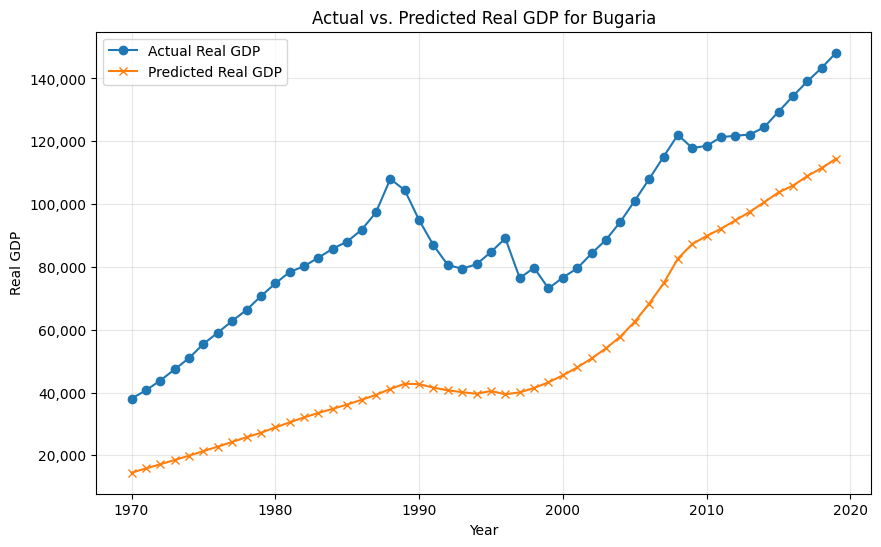

In [234]:
# Filter data for Bulgaria
bulgaria_data = transformed_df[transformed_df['country'] == 'Bulgaria']

# Create the plot
plt.figure(figsize=(10, 6))

# Plot actual Real GDP
plt.plot(bulgaria_data['year'], bulgaria_data['Real GDP'], label='Actual Real GDP', marker='o')

# Plot predicted Real GDP (assuming you have 'modelled_Real_GDP' column)
plt.plot(bulgaria_data['year'], bulgaria_data['modelled_Real_GDP'], label='Predicted Real GDP', marker='x')

# Customize the plot
plt.title('Actual vs. Predicted Real GDP for Bugaria')
plt.xlabel('Year')
plt.ylabel('Real GDP')
plt.legend()

# Format y-axis with comma separators
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Make gridlines fainter
plt.grid(True, alpha=0.3)  # Set alpha value for transparency

# Show the plot
plt.show()

## 4.7 Actual Vs Real GDP For Singapore (Developed Country) & Ecuador (Developing Country) Side By Side

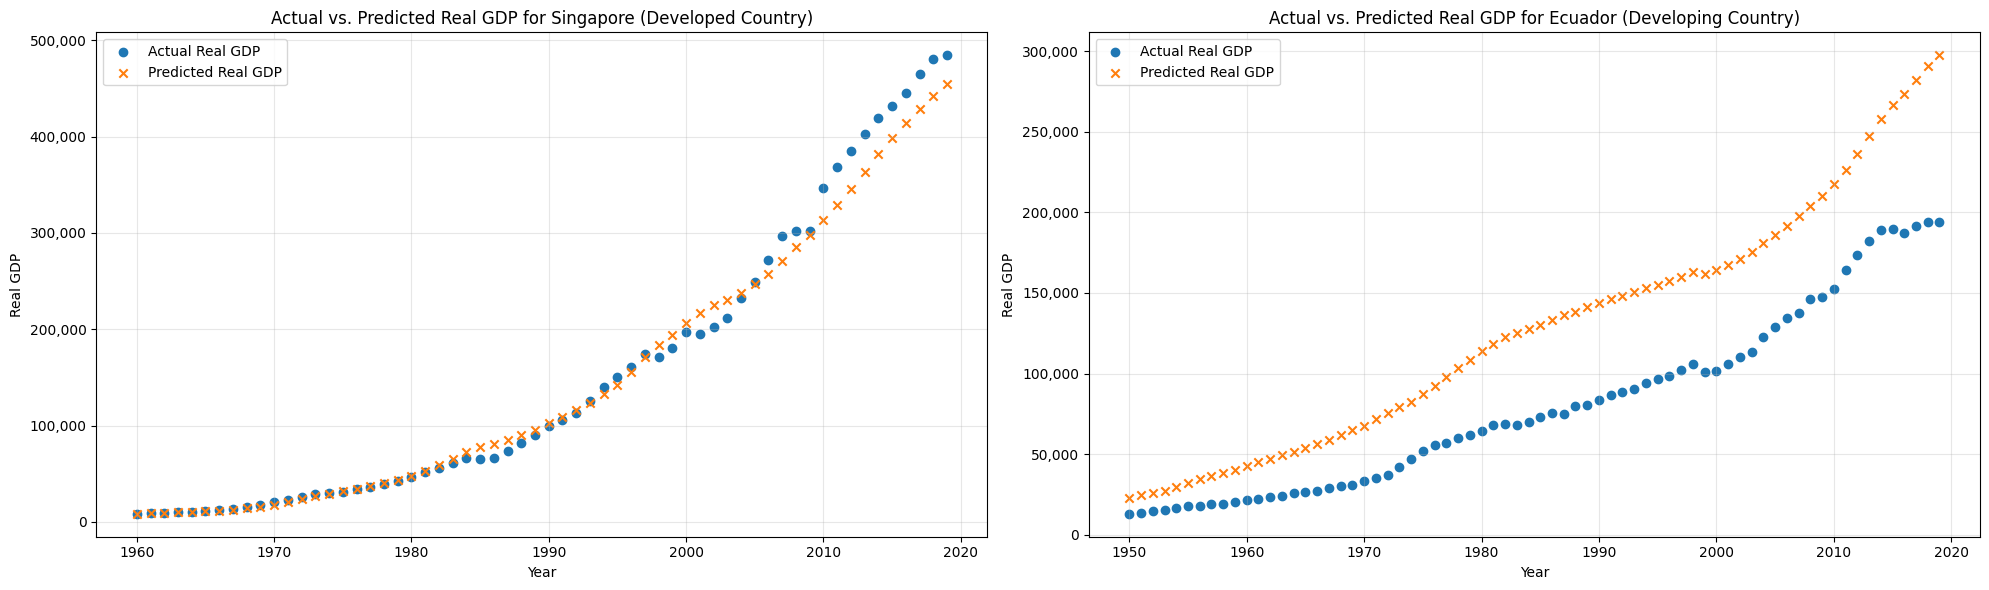

In [235]:
# Filter data for Singapore and Ecuador
singapore_data = transformed_df[transformed_df['country'] == 'Singapore']
ecuador_data = transformed_df[transformed_df['country'] == 'Ecuador']

# Create a figure and two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))  # Adjust figure size if needed

# --- Singapore Plot (Left) ---
# Scatter plot
ax1.scatter(singapore_data['year'], singapore_data['Real GDP'], label='Actual Real GDP', marker='o')
ax1.scatter(singapore_data['year'], singapore_data['modelled_Real_GDP'], label='Predicted Real GDP', marker='x')


# Customize the plot
ax1.set_title('Actual vs. Predicted Real GDP for Singapore (Developed Country)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Real GDP')
ax1.legend()

# Format y-axis with comma separators
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Make gridlines fainter
ax1.grid(True, alpha=0.3)


# --- Ecuador Plot (Right) ---
# Scatter plot
ax2.scatter(ecuador_data['year'], ecuador_data['Real GDP'], label='Actual Real GDP', marker='o')
ax2.scatter(ecuador_data['year'], ecuador_data['modelled_Real_GDP'], label='Predicted Real GDP', marker='x')

# Customize the plot
ax2.set_title('Actual vs. Predicted Real GDP for Ecuador (Developing Country)')
ax2.set_xlabel('Year')
ax2.set_ylabel('Real GDP')
ax2.legend()

# Format y-axis with comma separators
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Make gridlines fainter
ax2.grid(True, alpha=0.3)


# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

## 4.8 Actual Vs Real GDP For US (Developed Country) & China (Developing Country) Side By Side

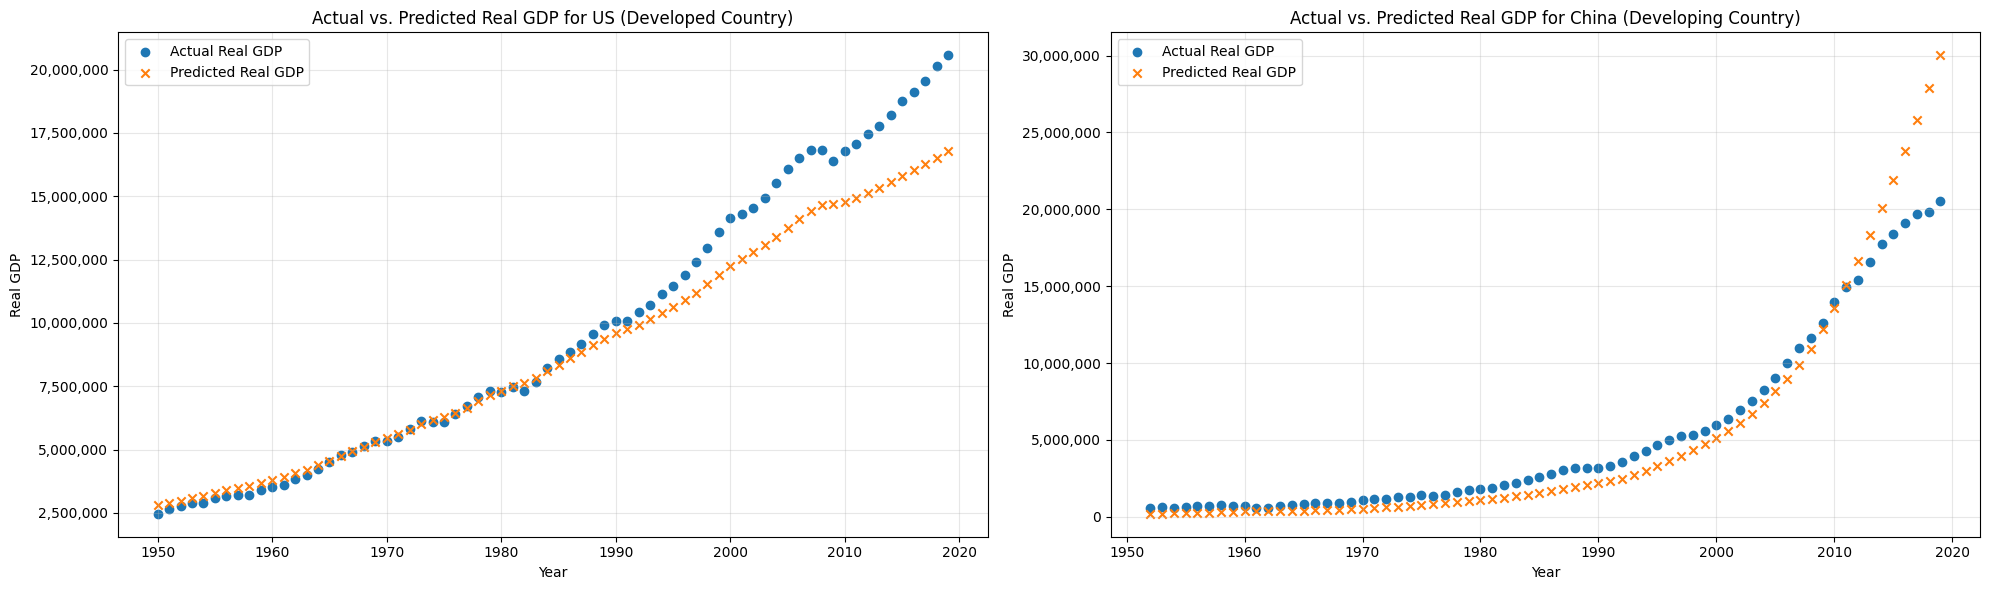

In [236]:
# Filter data for US and China
us_data = transformed_df[transformed_df['country'] == 'United States']
china_data = transformed_df[transformed_df['country'] == 'China']

# Create a figure and two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# --- US Plot (Left) ---
# Scatter plot
ax1.scatter(us_data['year'], us_data['Real GDP'], label='Actual Real GDP', marker='o')
ax1.scatter(us_data['year'], us_data['modelled_Real_GDP'], label='Predicted Real GDP', marker='x')

# Customize the plot
ax1.set_title('Actual vs. Predicted Real GDP for US (Developed Country)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Real GDP')
ax1.legend()

# Format y-axis with comma separators
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Make gridlines fainter
ax1.grid(True, alpha=0.3)


# --- China Plot (Right) ---
# Scatter plot
ax2.scatter(china_data['year'], china_data['Real GDP'], label='Actual Real GDP', marker='o')
ax2.scatter(china_data['year'], china_data['modelled_Real_GDP'], label='Predicted Real GDP', marker='x')

# Customize the plot
ax2.set_title('Actual vs. Predicted Real GDP for China (Developing Country)')
ax2.set_xlabel('Year')
ax2.set_ylabel('Real GDP')
ax2.legend()

# Format y-axis with comma separators
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Make gridlines fainter
ax2.grid(True, alpha=0.3)


# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

## 4.9 Actual Vs Real GDP For UK (Developed Country) & Bulgaria (Developing Country) Side By Side

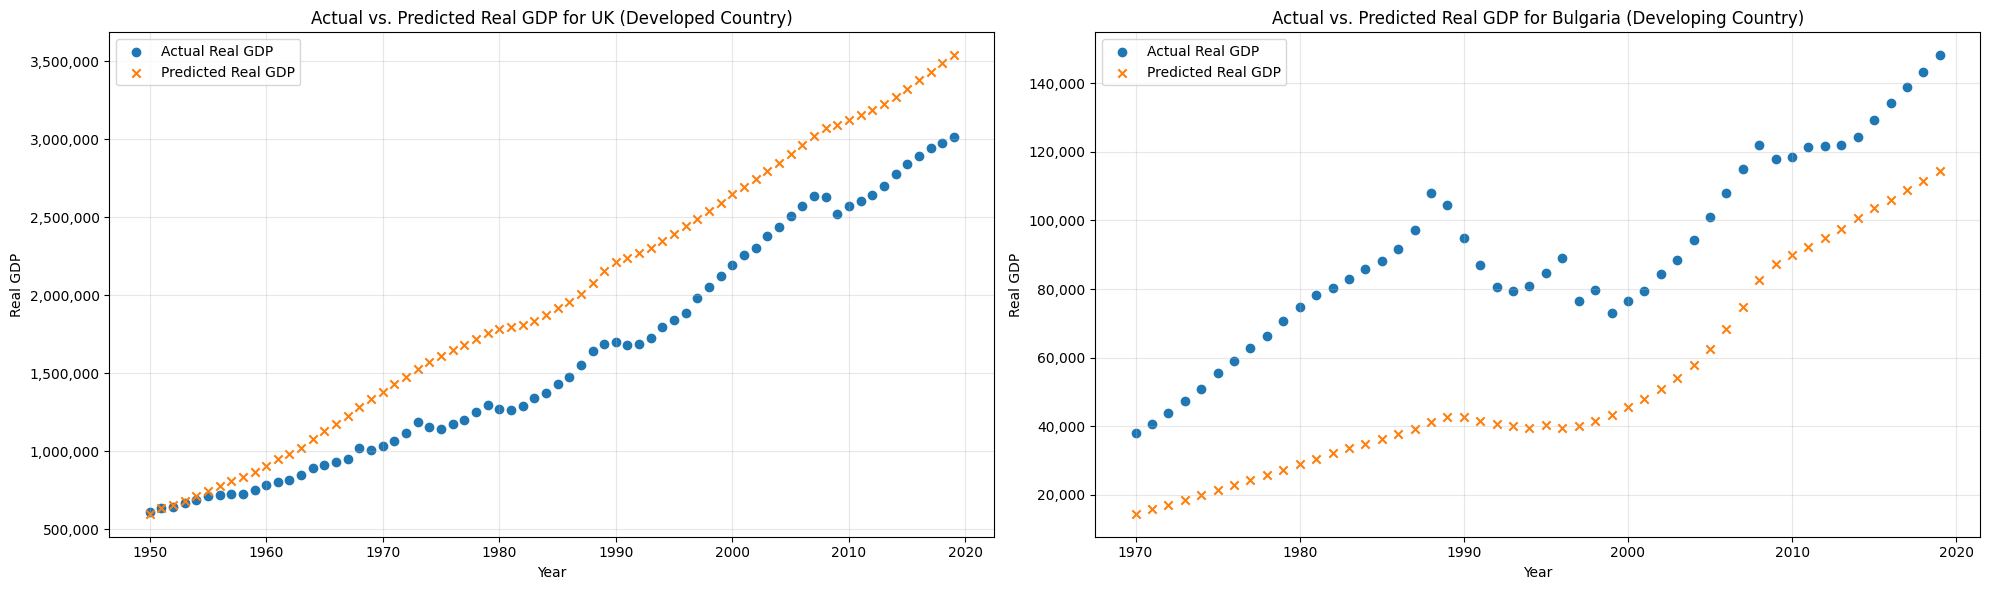

In [237]:
# Filter data for UK and Russia
uk_data = transformed_df[transformed_df['country'] == 'United Kingdom']
bulgaria_data = transformed_df[transformed_df['country'] == 'Bulgaria']

# Create a figure and two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# --- UK Plot (Left) ---
# Scatter plot
ax1.scatter(uk_data['year'], uk_data['Real GDP'], label='Actual Real GDP', marker='o')
ax1.scatter(uk_data['year'], uk_data['modelled_Real_GDP'], label='Predicted Real GDP', marker='x')

# Customize the plot
ax1.set_title('Actual vs. Predicted Real GDP for UK (Developed Country)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Real GDP')
ax1.legend()

# Format y-axis with comma separators
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Make gridlines fainter
ax1.grid(True, alpha=0.3)


# --- Russia Plot (Right) ---
# Scatter plot
ax2.scatter(bulgaria_data['year'], bulgaria_data['Real GDP'], label='Actual Real GDP', marker='o')
ax2.scatter(bulgaria_data['year'], bulgaria_data['modelled_Real_GDP'], label='Predicted Real GDP', marker='x')

# Customize the plot
ax2.set_title('Actual vs. Predicted Real GDP for Bulgaria (Developing Country)')
ax2.set_xlabel('Year')
ax2.set_ylabel('Real GDP')
ax2.legend()

# Format y-axis with comma separators
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Make gridlines fainter
ax2.grid(True, alpha=0.3)


# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

## 4.10 Comments On The Accuracy Of Model


**General Observations**
1. Developed vs. Developing: The simple model appears to be more accurate for developed countries like Singapore than for developing countries like Ecuador.
2. Singapore: For Singapore, the predicted GDP values closely follow the actual GDP values, indicating a good fit. There might be some deviations in certain years, but overall, the model seems to capture the trend well.
3. Ecuador: For Ecuador, there's a greater discrepancy between the actual and predicted GDP values. The predicted values often underestimate the actual values, suggesting the model might not fully capture the complex economic factors influencing Ecuador's growth.

**Reasons for Differences in Accuracy**

1. Model Complexity: This simple model uses only two independent variables (log capital and log labour) to predict GDP. This might be sufficient for developed countries with more stable and predictable economic environments. However, developing countries might have more complex and volatile economies influenced by various other factors not included in the model, leading to lower accuracy.
2. Data Quality: The quality and availability of data for developing countries might be lower than for developed countries. This could also affect the accuracy of the model.
3. Structural Changes: Developing countries might undergo significant structural changes in their economies over time, making it difficult for a simple model to predict their long-term GDP growth accurately.


**Further Improvements**

1. More Variables: Incorporating more relevant independent variables, such as education, trade openness, or investment, could improve the model's accuracy, especially for developing countries.
2. Nonlinear Relationships: Exploring nonlinear relationships between variables might be necessary as economic growth often exhibits non-linear patterns.
3. Dynamic Models: For developing countries with significant structural changes, dynamic models that account for time-varying relationships between variables could be more suitable.
4. Country-Specific Factors: Including country-specific factors or dummy variables for different groups of countries could help capture unique characteristics that influence economic growth.


**Overall Assessment**

While this simple model might provide a reasonable approximation for some countries, particularly those with relatively stable economies, it is likely to be less accurate for countries with more complex and dynamic economic environments. Therefore, it's essential to carefully interpret the results and consider the limitations of the model before making any decisions based on its predictions. For more accurate predictions and deeper insights, using more sophisticated models and richer data would be necessary.